# Project2 - Credit Card

## Import Packages

In [4]:
import numpy as np                                        # Numpy to carry out mathematical calculations
import pandas as pd                                       # Pandas to create and manipulate dataframe
import matplotlib.pyplot as plt                           # Matplotlib to plot the data points onto a graph
import seaborn as sns                                     # Seaborn to carry out statistical graphical functions 
import sklearn
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

## [1] Loading Dataset

In [5]:
df=pd.read_csv('J:\Courses\Vihara tech (Internship)\Projects\Pro2_Credit Card\creditcard.csv')
df.head()                                        # To get top 5 rows from table

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,Good


## [2] Feature Engineering (Data Cleaning)

In [6]:
# Finding information about data using info in pandas
df.info()                 # shows datatype of column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

## 2.1 Handling Null Values

In [7]:
# Checking null values
df.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

### Deleting 2 rows null values

In [8]:
# Checking index of 2 rows having null vales
df[df['NPA Status'].isnull()].index          

Int64Index([150000, 150001], dtype='int64')

In [9]:
# Checking index of 2 rows having null vales
df[df['age'].isnull()].index          

Int64Index([150000, 150001], dtype='int64')

In [10]:
# As we can see null values are present at same index of different columns so deleting null values in that index only

In [11]:
df = df.drop([150000, 150001], axis=0)    # axis=0 because we are removing rows, if col. then axis=1

In [12]:
# Again Checking null values after removing 2 rows null values
df.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

In [13]:
# As we can see MonthlyIncome and MonthlyIncome.1 column have same no. of null values so we can check if values are also same
# If values are same, then we can delete one column as it's duplicate column

In [14]:
df['MonthlyIncome'].head()

0     9120.0
1     2600.0
2     3042.0
3     3300.0
4    63588.0
Name: MonthlyIncome, dtype: float64

In [15]:
df['MonthlyIncome.1'].head()

0     9120.0
1     2600.0
2     3042.0
3     3300.0
4    63588.0
Name: MonthlyIncome.1, dtype: float64

In [16]:
# We can see that values are same in both the columns but we can't conclude by seeing 5-10 values so to have clear picture 
# we can check for standard deviation,if both are same then it's duplicate so 1 col can be removed if not then no need to remove

In [17]:
df['MonthlyIncome'].std()

14384.67421528196

In [18]:
df['MonthlyIncome.1'].std()

14384.67421528196

In [19]:
# Since, both col. have same std we can remove one column

In [20]:
df = df.drop(['MonthlyIncome.1'], axis=1)           # axis=1 as removing col

In [21]:
df.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

### Handling null values for NumberOfDependents col.

In [22]:
# NumberOfDependents column is filled with numeric values but in datatype it's showing as object(Categorical data)
# So, we need to convert it from object to int using pandas

In [23]:
df['NumberOfDependents'] = pd.to_numeric(df['NumberOfDependents'])

In [24]:
mean = df['NumberOfDependents'].mean()
median = df['NumberOfDependents'].median()
mode = df['NumberOfDependents'].mode()[0]
random = df['NumberOfDependents'].sample()

In [25]:
print('Mean of NumberOfDependents =', mean)
print('Median of NumberOfDependents =', median)
print('Mode of NumberOfDependents =', mode)
print('Random Sample of NumberOfDependents =', random)

Mean of NumberOfDependents = 0.7572222678605657
Median of NumberOfDependents = 0.0
Mode of NumberOfDependents = 0.0
Random Sample of NumberOfDependents = 103113   NaN
Name: NumberOfDependents, dtype: float64


In [26]:
# Replace Mean value in null value
def mean_replacement(df,var,value):
    df[var+'_mean_replaced'] = df[var].fillna(value)
mean_replacement(df, 'NumberOfDependents', mean)

In [27]:
# Replace Median value in null value
def median_replacement(df,var,value):
    df[var+'_median_replaced'] = df[var].fillna(value)
median_replacement(df, 'NumberOfDependents', median)

In [28]:
# Replace Mode value in null value
def mode_replacement(df,var,value):
    df[var+'_mode_replaced'] = df[var].fillna(value)
mode_replacement(df, 'NumberOfDependents', mode)

In [29]:
# Replace Random Sample value in null values
def RSI(df , var , value):
    df[var+'_random_replaced'] = df[var]
    S = df[var].dropna().sample(df[var].isnull().sum(), random_state=11)
    S.index = df[df[var].isnull()].index 
    df.loc[df[var].isnull(), var+'_random_replaced'] = S
RSI(df ,'NumberOfDependents', random)

In [30]:
df.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad', 'NumberOfDependents_mean_replaced',
       'NumberOfDependents_median_replaced',
       'NumberOfDependents_mode_replaced',
       'NumberOfDependents_random_replaced'],
      dtype='object')

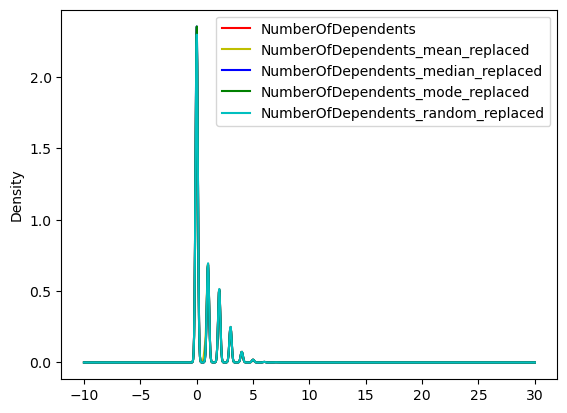

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['NumberOfDependents'].plot(kind='kde', ax=ax, color='r', legend='NumberOfDependents')
df['NumberOfDependents_mean_replaced'].plot(kind='kde', ax=ax, color='y', legend='NumberOfDependents_mean_replaced')
df['NumberOfDependents_median_replaced'].plot(kind='kde', ax=ax, color='b', legend='NumberOfDependents_median_replaced')
df['NumberOfDependents_mode_replaced'].plot(kind='kde', ax=ax, color='g', legend='NumberOfDependents_mode_replaced')
df['NumberOfDependents_random_replaced'].plot(kind='kde', ax=ax, color='c', legend='NumberOfDependents_random_replaced')
plt.legend(loc=0)
plt.show()

In [32]:
# Finding std of replaced values and comparing with original values

print('std of original variable : ',df['NumberOfDependents'].std())
print('std of Mean_replaced variable : ',df['NumberOfDependents_mean_replaced'].std())
print('std of Median_replaced variable : ',df['NumberOfDependents_median_replaced'].std())
print('std of Mode_replaced variable : ',df['NumberOfDependents_mode_replaced'].std())
print('std of Random_replaced variable : ',df['NumberOfDependents_random_replaced'].std())

std of original variable :  1.1150860714872928
std of Mean_replaced variable :  1.100403990651921
std of Median_replaced variable :  1.1070214146373272
std of Mode_replaced variable :  1.1070214146373272
std of Random_replaced variable :  1.114818486433015


In [33]:
# differences

print(1.1150860714872928 - 1.100403990651921)    # mean
print(1.1150860714872928 - 1.1070214146373272)   # median
print(1.1150860714872928 - 1.1070214146373272)   # mode
print(1.1150860714872928 - 1.114818486433015)    # Random Sample

0.014682080835371814
0.008064656849965601
0.008064656849965601
0.00026758505427770807


In [34]:
# After finding difference we can see how much close values are to original values, random sample is closer
# So, we can take random sample col. and delete other columns i.e, original, mean, median and mode col.

In [35]:
# Deleting columns which aren't required
df = df.drop(['NumberOfDependents', 'NumberOfDependents_mean_replaced', 'NumberOfDependents_median_replaced','NumberOfDependents_mode_replaced'], axis=1)

In [36]:
df.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
Good_Bad                                    0
NumberOfDependents_random_replaced          0
dtype: int64

### Handling null values for MonthlyIncome col.

In [37]:
mean1 = df['MonthlyIncome'].mean()
median1 = df['MonthlyIncome'].median()
mode1 = df['MonthlyIncome'].mode()[0]
random1 = df['MonthlyIncome'].sample()                               # Random Sample Imputation

In [38]:
print('Mean of MonthlyIncome =', mean1)
print('Median of MonthlyIncome =', median1)
print('Mode of MonthlyIncome =', mode1)
print('Random of MonthlyIncome =', random1)

Mean of MonthlyIncome = 6670.221237392844
Median of MonthlyIncome = 5400.0
Mode of MonthlyIncome = 5000.0
Random of MonthlyIncome = 32902    10000.0
Name: MonthlyIncome, dtype: float64


In [39]:
# mean
def mean_replacement1(df , var , value):
    df[var+'_mean_replaced'] = df[var].fillna(value)
mean_replacement1(df ,'MonthlyIncome',mean1)

In [40]:
# median
def median_replacement1(df , var , value):
    df[var+'_median_replaced'] = df[var].fillna(value)
median_replacement1(df ,'MonthlyIncome',median1)

In [41]:
# mode
def mode_replacement1(df , var , value):
    df[var+'_mode_replaced'] = df[var].fillna(value)
mode_replacement1(df ,'MonthlyIncome',mode1)

In [42]:
# Random Sample Imputation
def RSI1(df , var , value):
    df[var+'_random_replaced'] = df[var]
    S = df[var].dropna().sample(df[var].isnull().sum(), random_state=11)
    S.index = df[df[var].isnull()].index 
    df.loc[df[var].isnull(), var+'_random_replaced'] = S
RSI1(df ,'MonthlyIncome', random1)

In [43]:
df.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'Good_Bad', 'NumberOfDependents_random_replaced',
       'MonthlyIncome_mean_replaced', 'MonthlyIncome_median_replaced',
       'MonthlyIncome_mode_replaced', 'MonthlyIncome_random_replaced'],
      dtype='object')

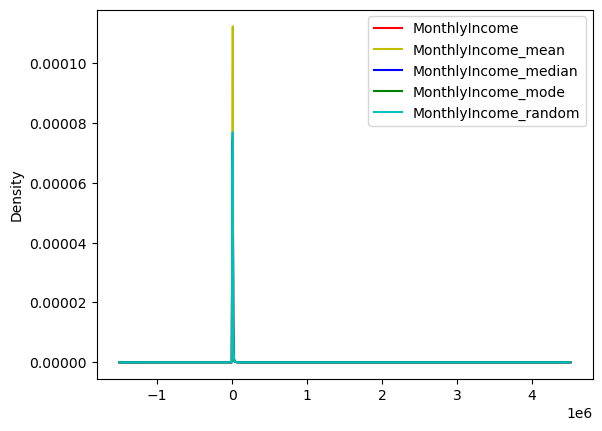

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df['MonthlyIncome'].plot(kind = 'kde' , ax = ax,color = 'r',label = 'MonthlyIncome')
df['MonthlyIncome_mean_replaced'].plot(kind = 'kde' , ax = ax,color = 'y',label = 'MonthlyIncome_mean')
df['MonthlyIncome_median_replaced'].plot(kind = 'kde' , ax = ax,color = 'b',label = 'MonthlyIncome_median')
df['MonthlyIncome_mode_replaced'].plot(kind = 'kde' , ax = ax,color = 'g',label = 'MonthlyIncome_mode')
df['MonthlyIncome_random_replaced'].plot(kind = 'kde' , ax = ax,color = 'c',label = 'MonthlyIncome_random')
plt.legend(loc = 0)
plt.show()

In [45]:
# Finding std of replaced values and comparing with original values

print('std of original variable : ',df['MonthlyIncome'].std())
print('std of Mean_replaced variable : ',df['MonthlyIncome_mean_replaced'].std())
print('std of Median_replaced variable : ',df['MonthlyIncome_median_replaced'].std())
print('std of Mode_replaced variable : ',df['MonthlyIncome_mode_replaced'].std())
print('std of MonthlyIncome_random_replaced : ',df['MonthlyIncome_random_replaced'].std())

std of original variable :  14384.67421528196
std of Mean_replaced variable :  12880.445756227951
std of Median_replaced variable :  12890.395542156863
std of Mode_replaced variable :  12897.643871989698
std of MonthlyIncome_random_replaced :  15421.181597041596


In [46]:
# differences

print(14384.67421528196 - 2880.445756227951)       # mean
print(14384.67421528196 - 12890.395542156863)      # median
print(14384.67421528196 - 12897.643871989698)      # mode
print(14384.67421528196 - 15421.181597041596)     # Random Sample

11504.22845905401
1494.278673125098
1487.0303432922628
-1036.5073817596349


In [47]:
# After finding difference we can see how much close values are to original values, random sample is closer
# So, we can take random sample col. and delete other columns i.e, original, mean, median and mode col.

In [48]:
# Deleting columns which aren't required
df = df.drop(['MonthlyIncome','MonthlyIncome_mean_replaced','MonthlyIncome_median_replaced', 'MonthlyIncome_mode_replaced'],axis = 1)

In [49]:
df.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
NumberOfDependents_random_replaced      0
MonthlyIncome_random_replaced           0
dtype: int64

## 2.2 Checking Normal Distribution (KDE) for numerical data

In [50]:
df_num = df.select_dtypes(exclude='object')
df_num.shape

(150000, 11)

In [51]:
df_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents_random_replaced', 'MonthlyIncome_random_replaced'],
      dtype='object')

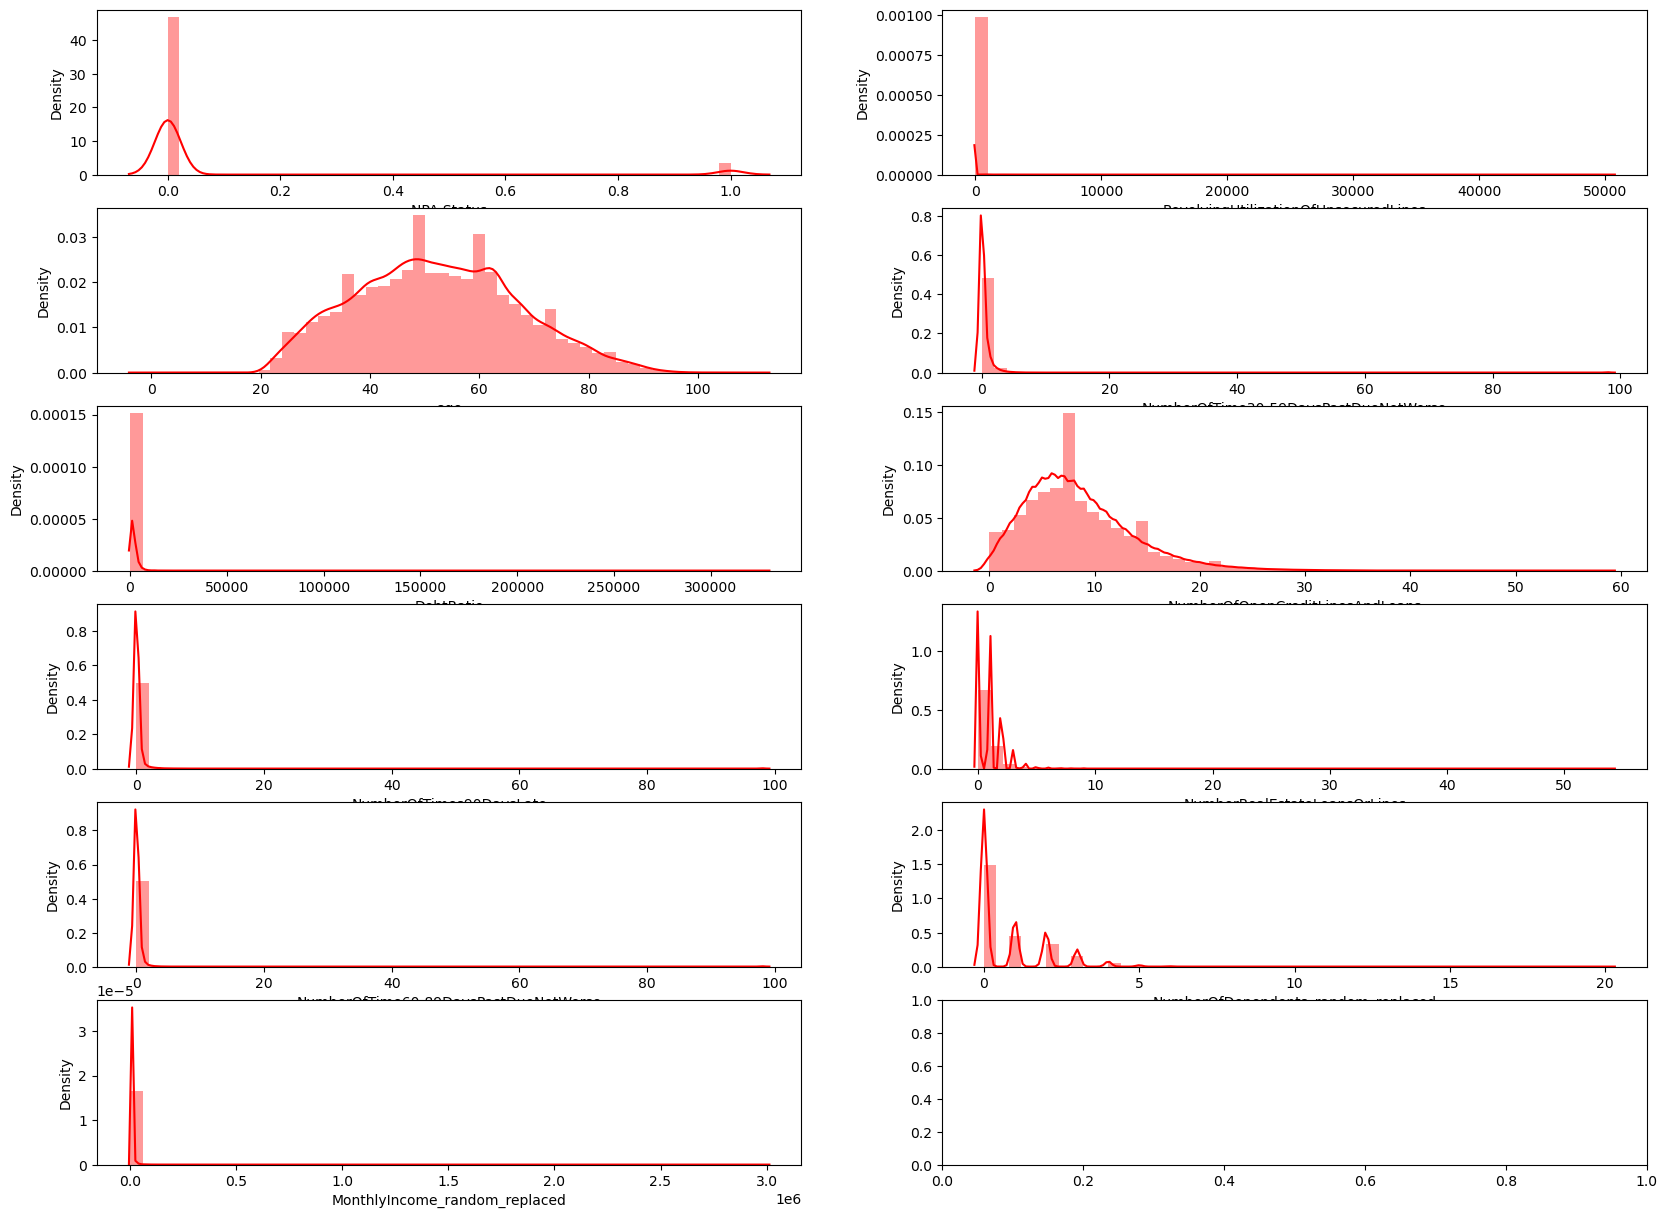

In [52]:
y = df_num.columns
fig , ax = plt.subplots(6 , 2 , figsize=(20,15))
for i,subplot in zip(y,ax.flatten()):
    sns.distplot(df_num[i],ax=subplot,color = 'r')        # distplot: used to check Normal distribution

## 2.3 Variable Transformation

In [53]:
def fun(df_num , var):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title('boxplot')
    sns.boxplot(df_num[var])
    plt.subplot(1,3,2)
    plt.title('hist')
    plt.hist(df_num[var])
    plt.subplot(1,3,3)
    plt.title('Probplot')
    stats.probplot(df_num[var],dist='norm',plot = plt)
    plt.show()

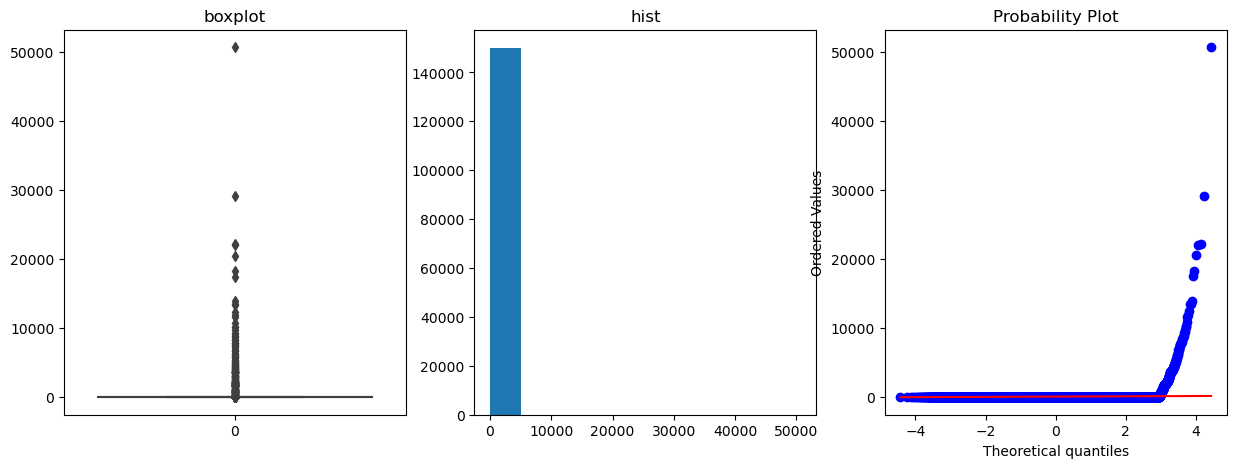

In [54]:
# Checking for 1 col.
fun(df_num,'RevolvingUtilizationOfUnsecuredLines')

### Applying yeojohnson tech. for 1 col and checking wheather it's working or not

In [55]:
df_num['RevolvingUtilizationOfUnsecuredLines_chec'] , alpha = stats.yeojohnson(df_num['RevolvingUtilizationOfUnsecuredLines'])

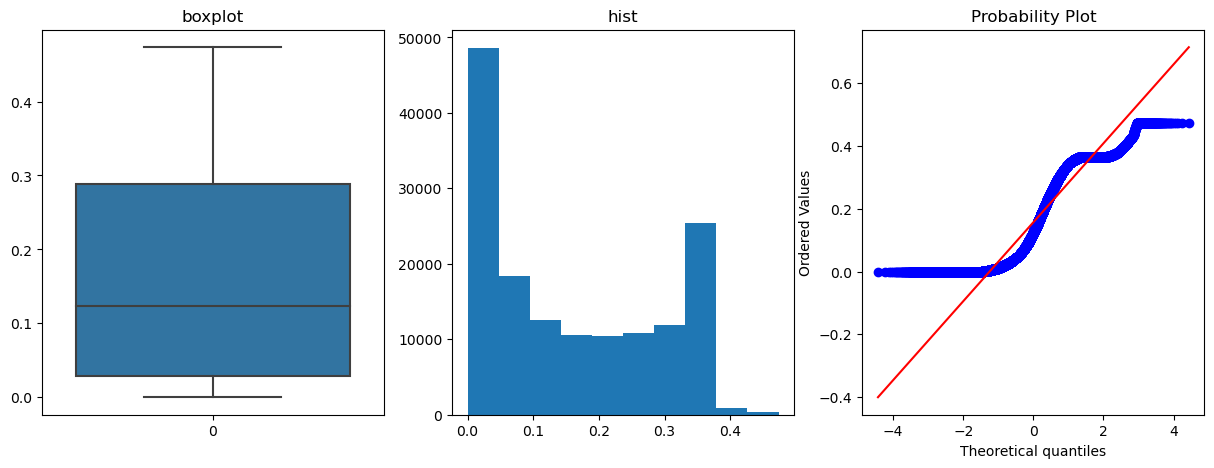

In [56]:
fun(df_num,'RevolvingUtilizationOfUnsecuredLines_chec')

In [57]:
# We can see yeojohnson is working so we need to apply for all the col. 

In [58]:
df_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents_random_replaced', 'MonthlyIncome_random_replaced',
       'RevolvingUtilizationOfUnsecuredLines_chec'],
      dtype='object')

In [59]:
df_num = df_num.drop(['RevolvingUtilizationOfUnsecuredLines_chec'],axis = 1)
df_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents_random_replaced', 'MonthlyIncome_random_replaced'],
      dtype='object')

### Applying yeojohnson for all numerical col.

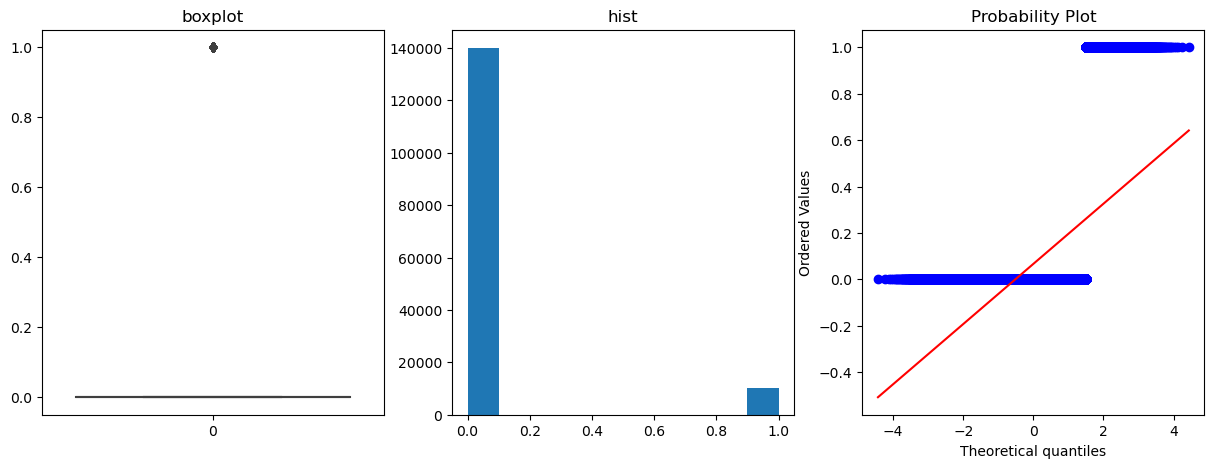

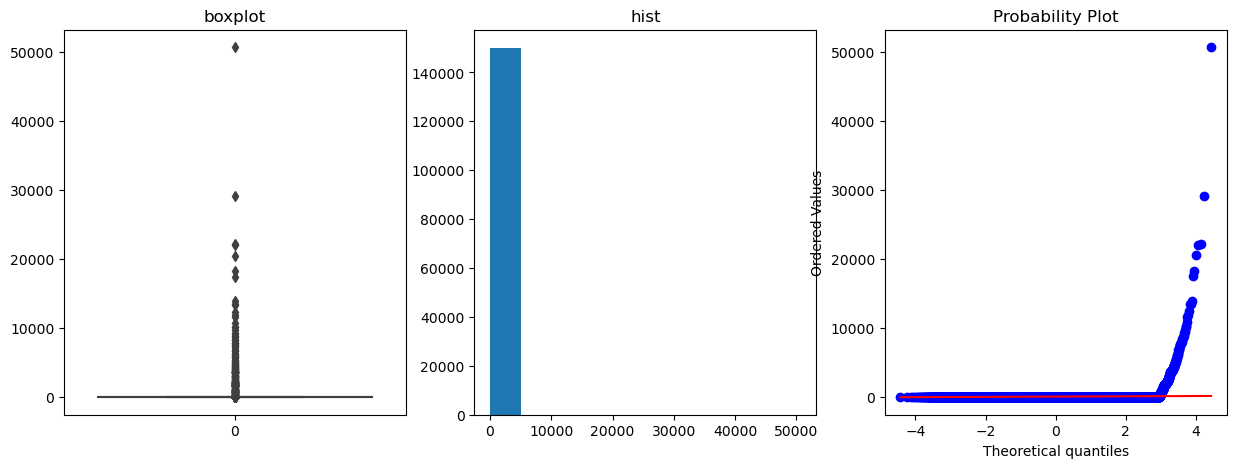

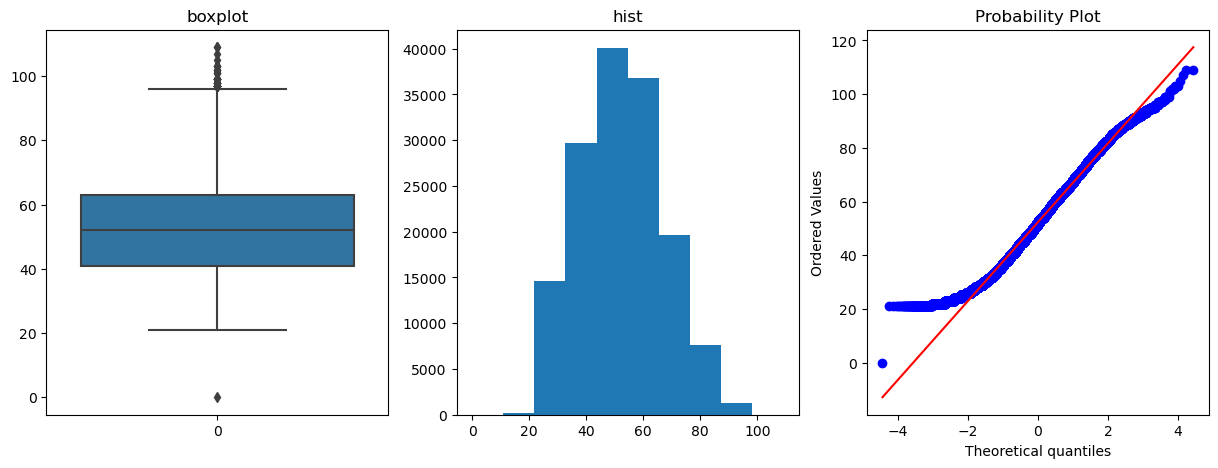

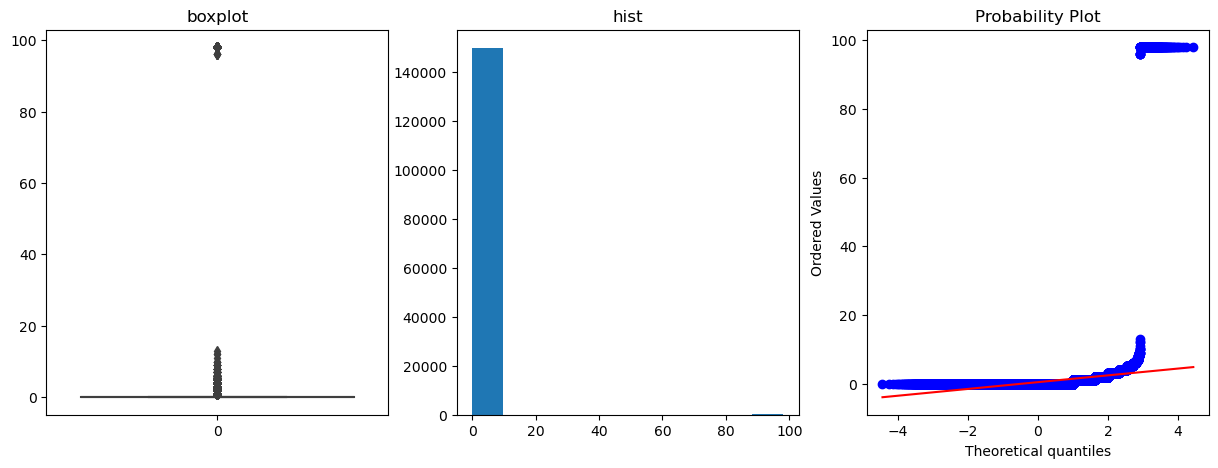

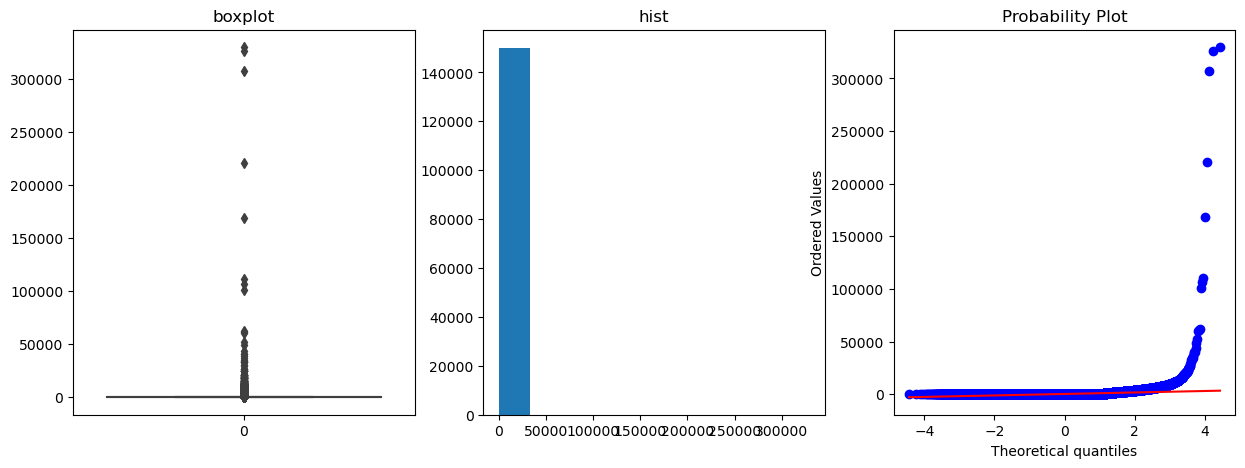

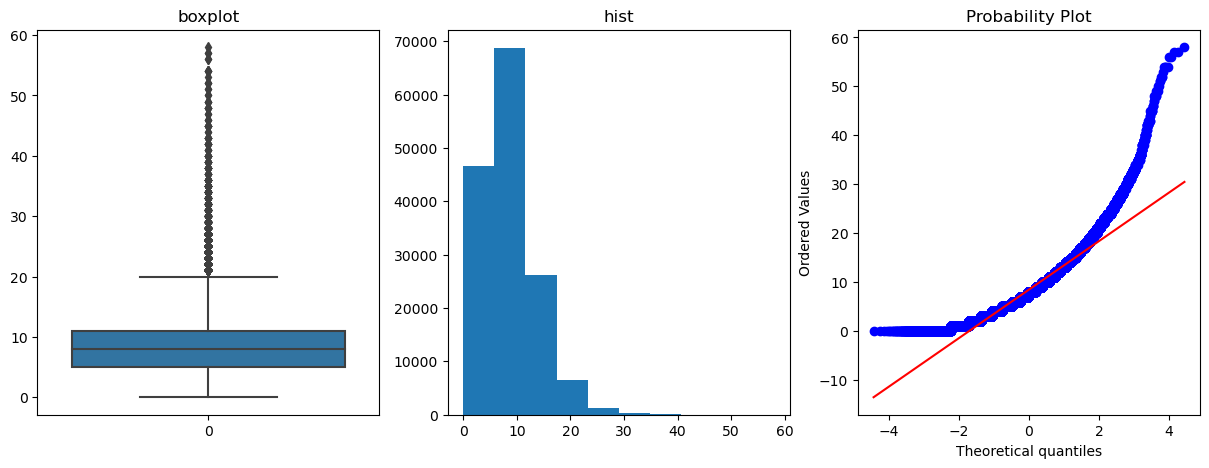

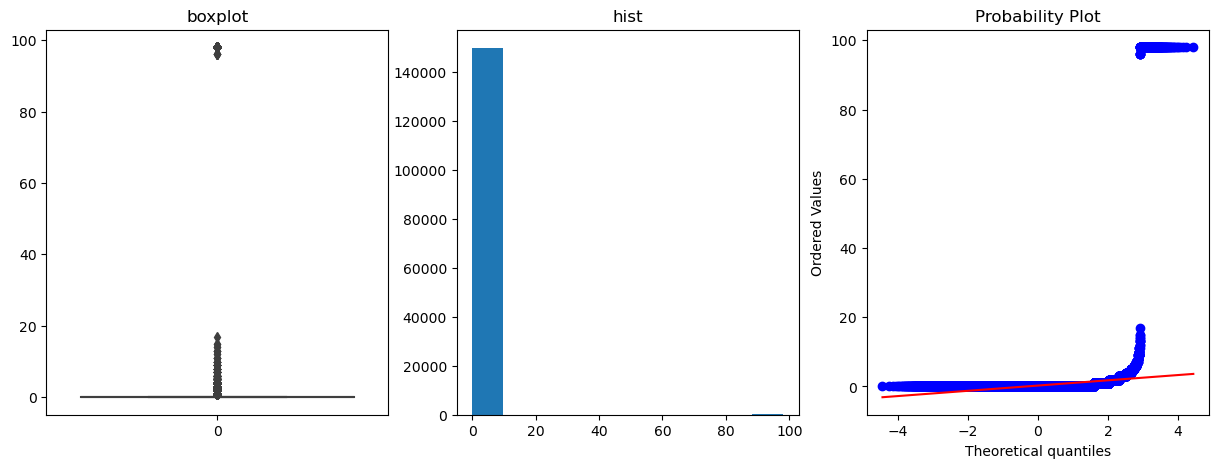

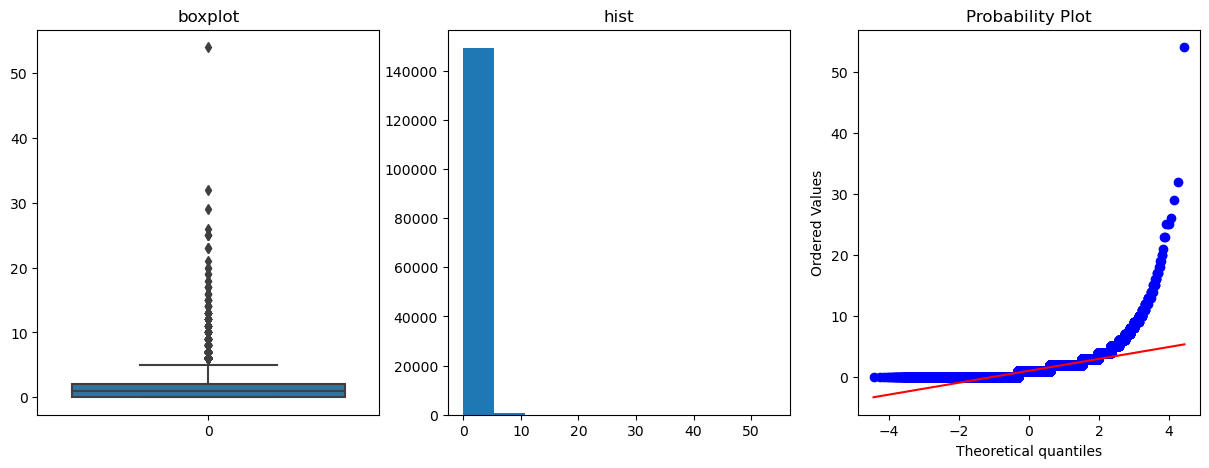

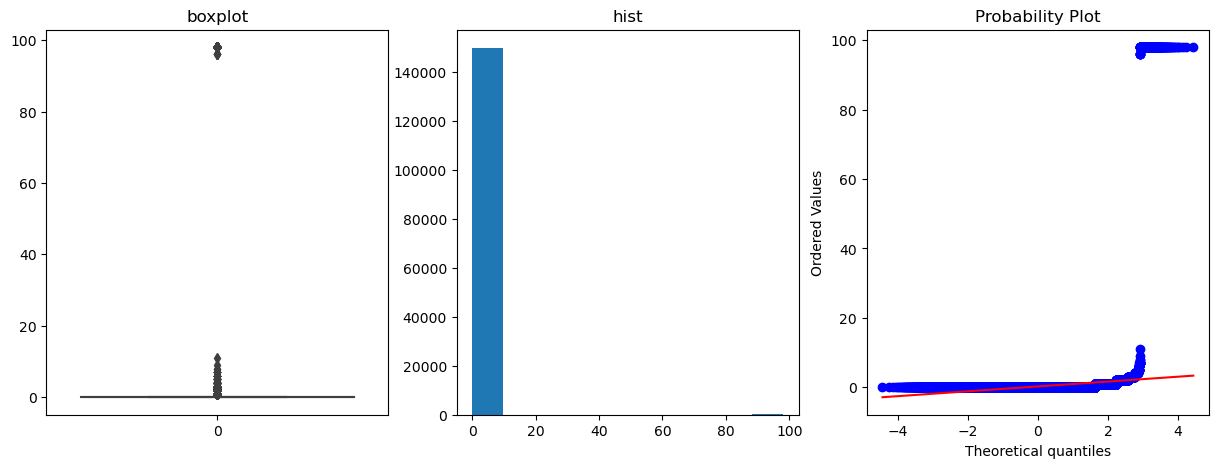

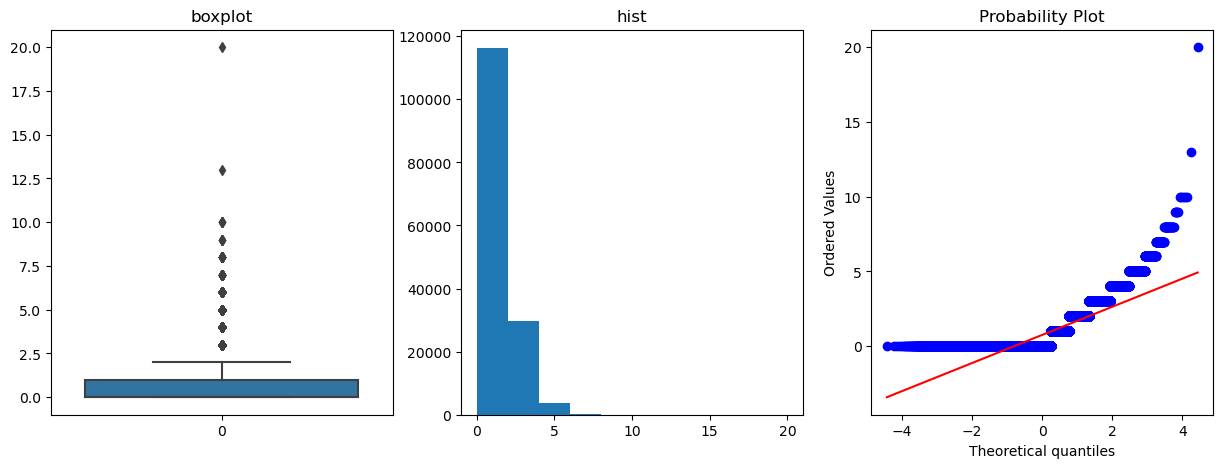

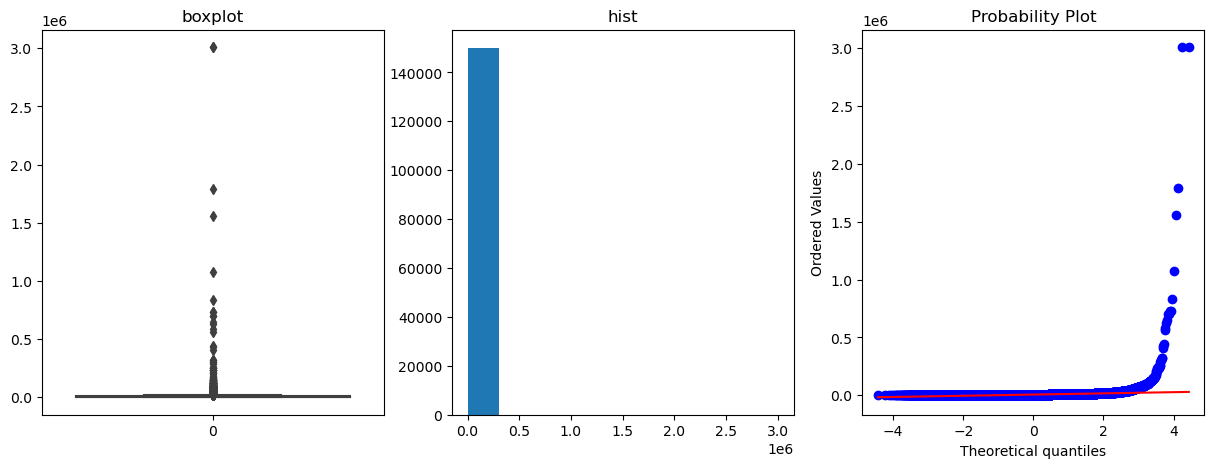

In [60]:
for i in df_num.columns:
    df_num[i+'_yoe'], alpha = stats.yeojohnson(df_num[i])
    fun(df_num , i)

In [61]:
df_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents_random_replaced', 'MonthlyIncome_random_replaced',
       'NPA Status_yoe', 'RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe',
       'NumberOfTime30-59DaysPastDueNotWorse_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe', 'NumberOfTimes90DaysLate_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfTime60-89DaysPastDueNotWorse_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe'],
      dtype='object')

### Ploting boxplot for original features

In [62]:
a = ['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents_random_replaced', 'MonthlyIncome_random_replaced']

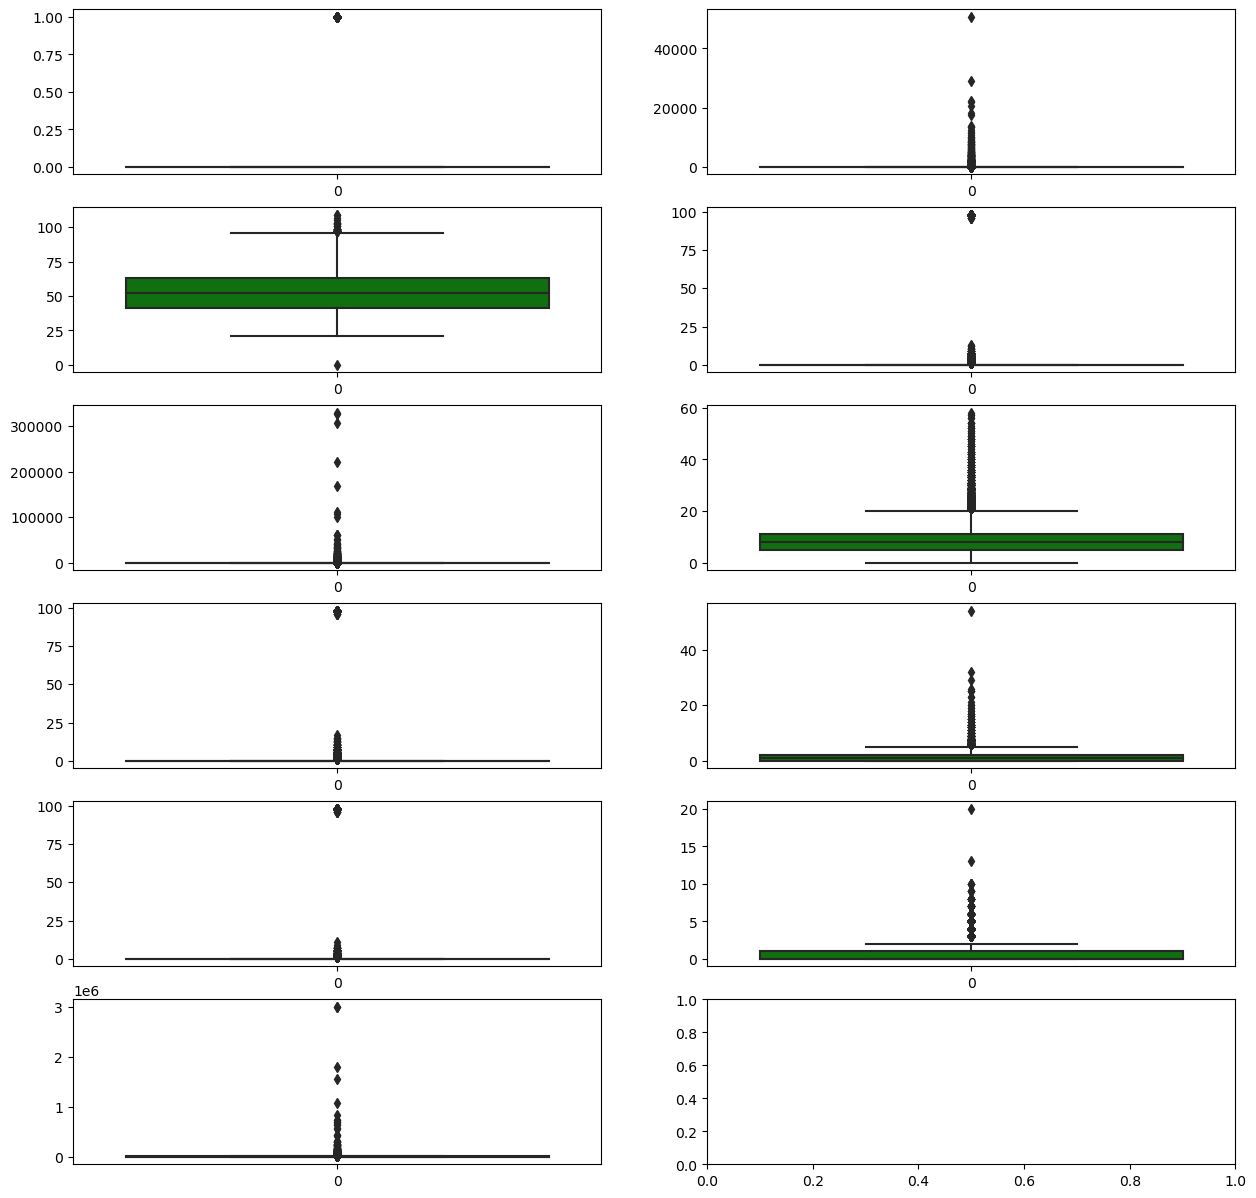

In [63]:
fig , ax = plt.subplots(6 , 2 , figsize=(15,15))
for i,subplot in zip(a,ax.flatten()):
    sns.boxplot(df_num[i],ax=subplot,color = 'g')   

### Ploting boxplot after applying yeojohnson

In [64]:
b = ['NPA Status_yoe', 'RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe',
       'NumberOfTime30-59DaysPastDueNotWorse_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe', 'NumberOfTimes90DaysLate_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfTime60-89DaysPastDueNotWorse_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe']

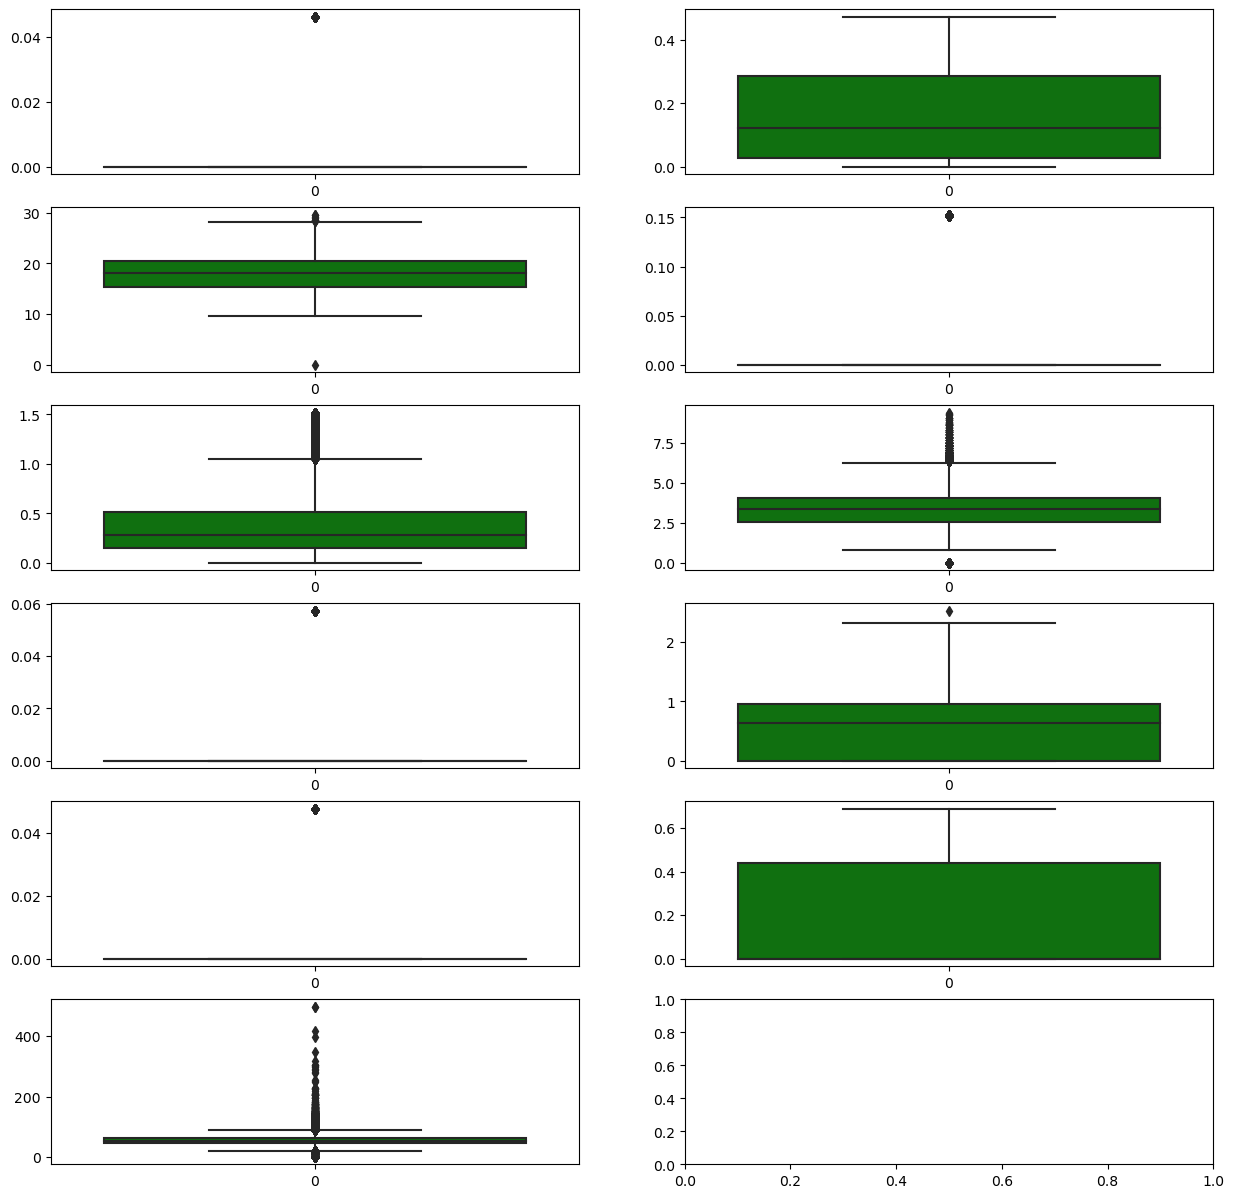

In [65]:
fig , ax = plt.subplots(6 , 2 , figsize=(15,15))
for i,subplot in zip(b,ax.flatten()):
    sns.boxplot(df_num[i],ax=subplot,color = 'g')

In [66]:
b[0] , b[3] , b[6] , b[8]   # deleting features which don't have proper data

('NPA Status_yoe',
 'NumberOfTime30-59DaysPastDueNotWorse_yoe',
 'NumberOfTimes90DaysLate_yoe',
 'NumberOfTime60-89DaysPastDueNotWorse_yoe')

In [67]:
er = ['NPA Status_yoe',
 'NumberOfTime30-59DaysPastDueNotWorse_yoe',
 'NumberOfTimes90DaysLate_yoe',
 'NumberOfTime60-89DaysPastDueNotWorse_yoe']


for i in er:
    print('The unique values in'+' '+i+' = '+str(df_num[i].unique()))
    print()

The unique values in NPA Status_yoe = [ 0.04633016 -0.        ]

The unique values in NumberOfTime30-59DaysPastDueNotWorse_yoe = [ 0.15258751 -0.          0.15107101  0.15268473  0.15269811  0.15270093
  0.15270196  0.15270213  0.1527017   0.15270215  0.15270214  0.15270206
  0.15270211  0.15270215  0.15270215  0.15270214]

The unique values in NumberOfTimes90DaysLate_yoe = [-0.          0.05728178  0.0572821   0.0572821   0.0572821   0.0572821
  0.0572821   0.0572821   0.0572821 ]

The unique values in NumberOfTime60-89DaysPastDueNotWorse_yoe = [-0.          0.04777653  0.04777656  0.04777656  0.04777656  0.04777656]



In [68]:
df_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents_random_replaced', 'MonthlyIncome_random_replaced',
       'NPA Status_yoe', 'RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe',
       'NumberOfTime30-59DaysPastDueNotWorse_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe', 'NumberOfTimes90DaysLate_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfTime60-89DaysPastDueNotWorse_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe'],
      dtype='object')

In [69]:
len(df_num.columns)

22

In [70]:
df_num_1 = df_num[['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe','DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe']]

In [71]:
len(df_num_1.columns)

7

### Ploting boxplot after removing col. which don't have proper data

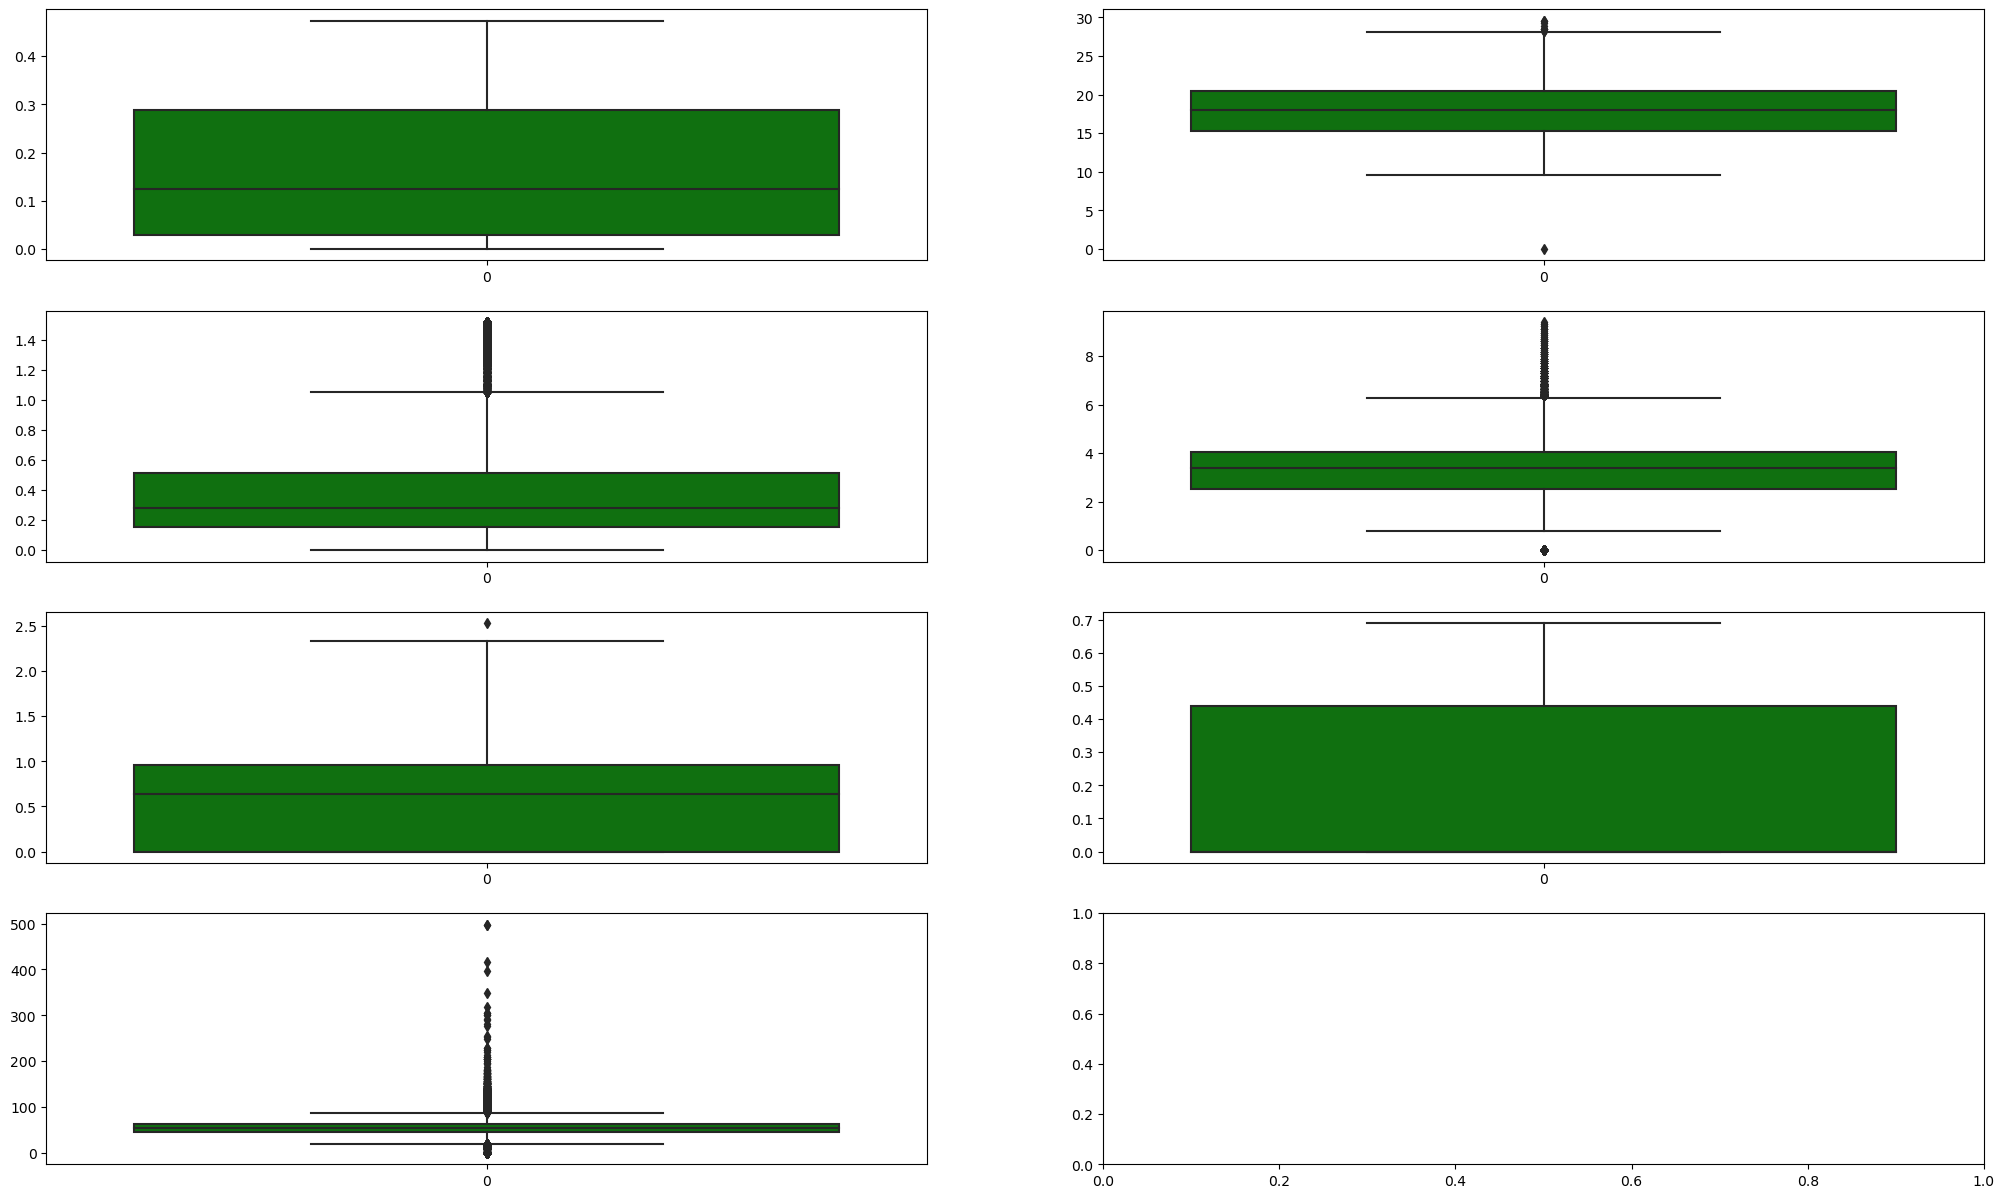

In [72]:
c = df_num_1.columns
fig , ax = plt.subplots(4 , 2 , figsize=(25,15))
for i,subplot in zip(c,ax.flatten()):
    sns.boxplot(df_num_1[i],ax=subplot,color = 'g')

## 2.4 Feature Scaling

### Using Standard Scalar technique for scaling down the values so that we can get proper features for the model

In [73]:
##  Scaling down using z_score = xi - mean / std

In [74]:
df_num_1.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe'],
      dtype='object')

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_num_1_s = sc.fit_transform(df_num_1)

In [76]:
df_num_1_s = pd.DataFrame(df_num_1_s,columns=df_num_1.columns)

In [77]:
df_num_1

,RevolvingUtilizationOfUnsecuredLines_yoe,age_yoe,DebtRatio_yoe,NumberOfOpenCreditLinesAndLoans_yoe,NumberRealEstateLoansOrLines_yoe,NumberOfDependents_random_replaced_yoe,MonthlyIncome_random_replaced_yoe
0,0.331073,16.332281,0.488422,4.439100,1.540239,0.553322,64.647328
1,0.358850,15.070576,0.110751,2.190140,-0.000000,0.439410,40.892211
2,0.310778,14.550317,0.079524,1.351546,-0.000000,-0.000000,43.331683
3,0.169687,12.363058,0.035005,2.529383,-0.000000,-0.000000,44.649652
4,0.352419,17.305890,0.024421,3.112772,0.636320,-0.000000,129.202936
...,...,...,...,...,...,...,...
149995,0.038236,22.849805,0.190045,2.190140,0.636320,-0.000000,37.779334
149996,0.201322,16.084113,0.454573,2.190140,0.636320,0.553322,54.120312
149997,0.175953,19.398153,1.510445,5.285619,0.636320,-0.000000,53.822621
149998,-0.000000,12.363058,-0.000000,2.190140,-0.000000,-0.000000,54.582247


In [78]:
df_num_1_s            # scaled values

,RevolvingUtilizationOfUnsecuredLines_yoe,age_yoe,DebtRatio_yoe,NumberOfOpenCreditLinesAndLoans_yoe,NumberRealEstateLoansOrLines_yoe,NumberOfDependents_random_replaced_yoe,MonthlyIncome_random_replaced_yoe
0,1.299993,-0.451146,0.001749,0.950011,2.402863,1.338750,0.700417
1,1.507488,-0.812700,-0.733645,-0.872653,-1.181182,0.895955,-0.800230
2,1.148383,-0.961786,-0.794450,-1.552290,-1.181182,-0.812096,-0.646125
3,0.094406,-1.588567,-0.881137,-0.597715,-1.181182,-0.812096,-0.562867
4,1.459452,-0.172148,-0.901745,-0.124909,0.299496,-0.812096,4.778493
...,...,...,...,...,...,...,...
149995,-0.887557,1.416518,-0.579245,-0.872653,0.299496,-0.812096,-0.996875
149996,0.330724,-0.522261,-0.064161,-0.872653,0.299496,1.338750,0.035409
149997,0.141211,0.427412,1.991815,1.636070,0.299496,-0.812096,0.016604
149998,-1.173189,-1.588567,-0.949298,-0.872653,-1.181182,-0.812096,0.064590


### Checking Boxplot after scaling wheather distribution has changed or not

In [79]:
len(df_num_1_s.columns)

7

In [80]:
df_num_1_s.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe'],
      dtype='object')

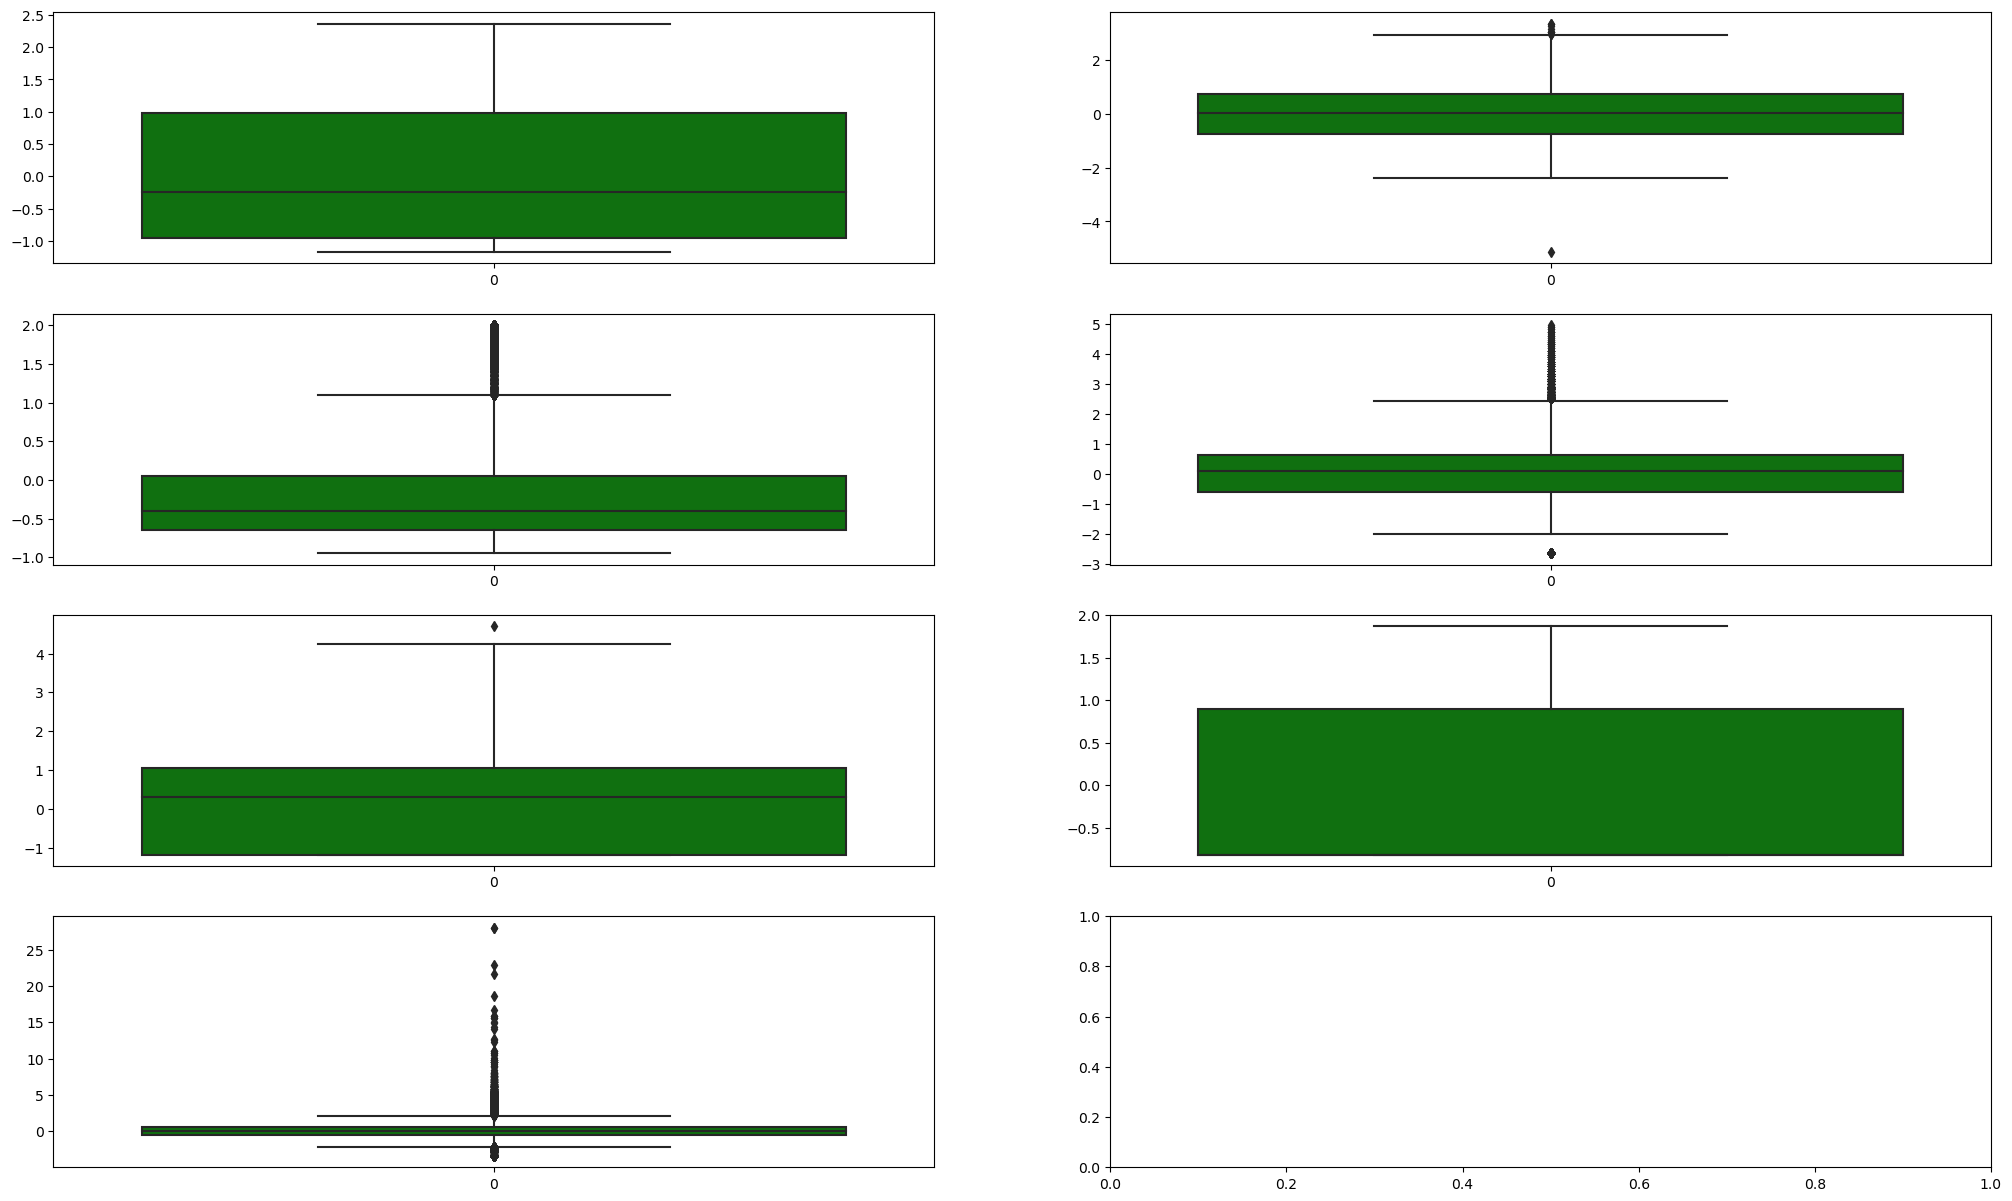

In [81]:
s = df_num_1_s.columns

fig , ax = plt.subplots(4 , 2 , figsize=(25,15))
for i,subplot in zip(s,ax.flatten()):
    sns.boxplot(df_num_1_s[i],ax=subplot,color = 'g')

## 2.5 Handling Outliers using IQR technique with 5th & 95th

In [82]:
df_num_1_s.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe'],
      dtype='object')

In [83]:
df_cap = df_num_1_s.copy()

In [84]:
def iqr_capping(df, cols, factor):             # handing the outliers
    for col in cols: 
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - (factor * iqr)
        upper_limit = q3 + (factor * iqr)
        
        df[col] = np.where(df[col]>upper_limit, upper_limit, 
                 np.where(df[col]<lower_limit, lower_limit, df[col])) 

In [85]:
iqr_capping(df_cap, df_num_1_s, 1.5)

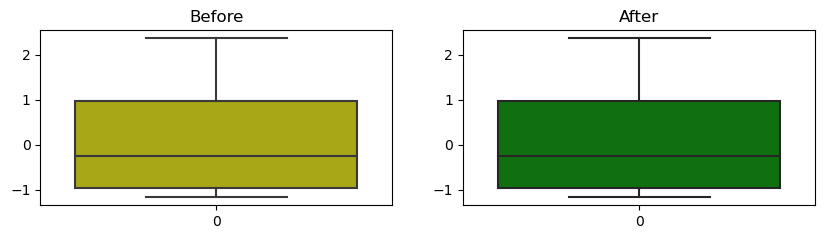

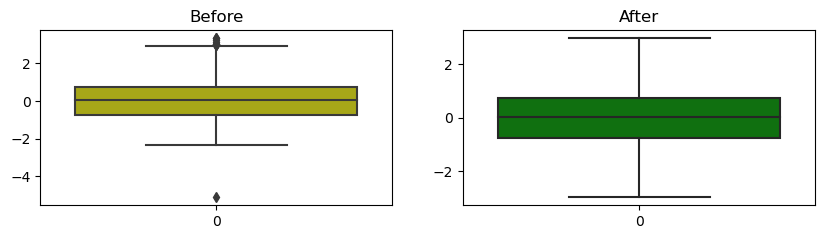

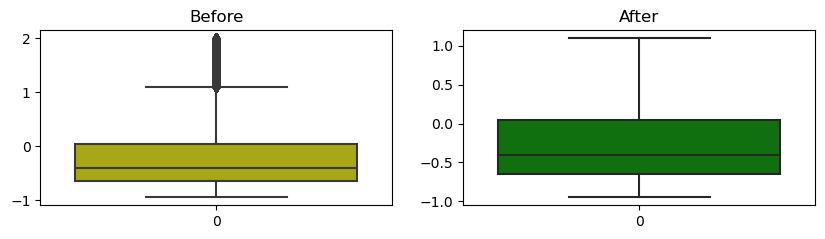

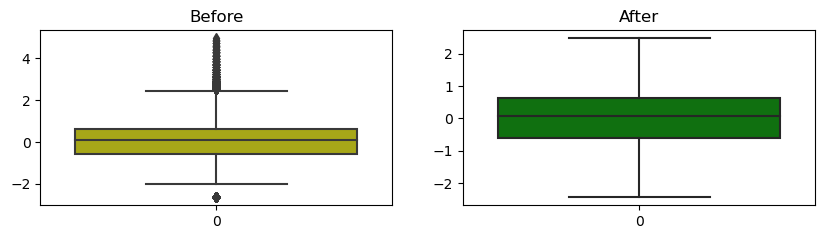

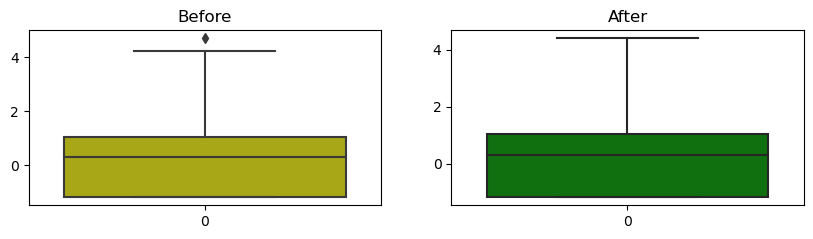

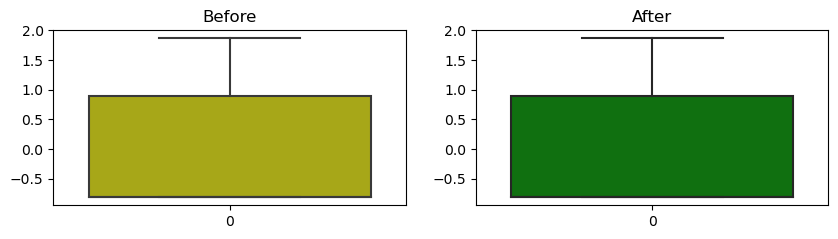

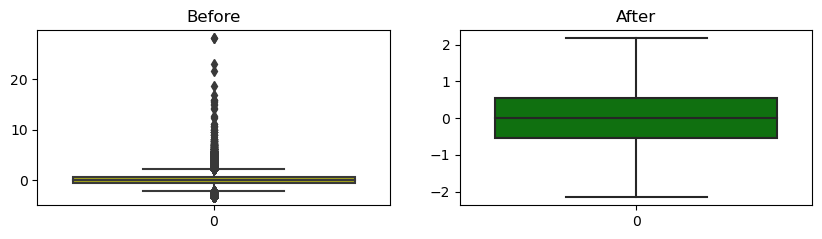

In [86]:
for col in df_num_1_s:
    plt.figure(figsize=(10,5))
    
    plt.subplot(221)
    sns.boxplot(df_num_1_s[col], color='y')
    plt.title('Before')
    
    plt.subplot(222)
    sns.boxplot(df_cap[col], color='g')
    plt.title('After')
    
    plt.show()    

In [87]:
# We can see all outliers has been handled now 

In [88]:
final_df_num = df_num_1_s[['RevolvingUtilizationOfUnsecuredLines_yoe', 
                           'age_yoe','DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe']]

In [89]:
final_df_num.head()

,RevolvingUtilizationOfUnsecuredLines_yoe,age_yoe,DebtRatio_yoe,NumberOfOpenCreditLinesAndLoans_yoe,NumberRealEstateLoansOrLines_yoe,NumberOfDependents_random_replaced_yoe,MonthlyIncome_random_replaced_yoe
0,1.299993,-0.451146,0.001749,0.950011,2.402863,1.338750,0.700417
1,1.507488,-0.812700,-0.733645,-0.872653,-1.181182,0.895955,-0.800230
2,1.148383,-0.961786,-0.794450,-1.552290,-1.181182,-0.812096,-0.646125
3,0.094406,-1.588567,-0.881137,-0.597715,-1.181182,-0.812096,-0.562867
4,1.459452,-0.172148,-0.901745,-0.124909,0.299496,-0.812096,4.778493


## Working with Categorical Data

In [90]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
0,Male,South,Ownhouse,Self_Emp,Matric,Bad
1,Female,South,Ownhouse,Self_Emp,Graduate,Good
2,Female,South,Ownhouse,Self_Emp,PhD,Good
3,Female,South,Ownhouse,Self_Emp,Professional,Good
4,Male,South,Ownhouse,Self_Emp,Post-Grad,Good


In [91]:
for i in df_cat:
    print('Feature ',i,'= ',df_cat[i].unique())

Feature  Gender =  ['Male' 'Female']
Feature  Region =  ['South' 'North' 'West' 'East' 'Central']
Feature  Rented_OwnHouse =  ['Ownhouse' 'Rented']
Feature  Occupation =  ['Self_Emp' 'Officer1' 'Officer3' 'Non-officer' 'Officer2']
Feature  Education =  ['Matric' 'Graduate' 'PhD' 'Professional' 'Post-Grad']
Feature  Good_Bad =  ['Bad' 'Good']


In [92]:
df_cat.isnull().sum()

Gender             0
Region             0
Rented_OwnHouse    0
Occupation         0
Education          0
Good_Bad           0
dtype: int64

### converting categorical to numerical 

In [93]:
# for gender , Region , Rented house will go with map method
# Education and Occupation will go with Odinal encoding 
# Good_bad its a dependent we need to use label encoding 

#### Using map method to convert from categorical data to numerical data

In [94]:
df_cat['Gender'] = df_cat['Gender'].map({'Male':1, 'Female':0}) 
df_cat['Rented_OwnHouse'] = df_cat['Rented_OwnHouse'].map({'Ownhouse':1, 'Rented':0})
df_cat['Region'] = df_cat['Region'].map({'South':0, 'North':1, 'West':2, 'East':3, 'Central':4})
df_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
0,1,0,1,Self_Emp,Matric,Bad
1,0,0,1,Self_Emp,Graduate,Good
2,0,0,1,Self_Emp,PhD,Good
3,0,0,1,Self_Emp,Professional,Good
4,1,0,1,Self_Emp,Post-Grad,Good


#### Using Odinal encoding method to convert from categorical data to numerical data

In [95]:
from sklearn.preprocessing import OrdinalEncoder
o = OrdinalEncoder()
o1 = o.fit_transform(df_cat[['Occupation','Education']])
#o1 = o1.toarray()
o1 = pd.DataFrame(o1, index=df_cat.index)
o1.columns = ['Occupation_re','Education_re']
df_cat = pd.concat([df_cat, o1],axis = 1)
df_cat = df_cat.drop(['Occupation','Education'], axis = 1)
df_cat.head()

,Gender,Region,Rented_OwnHouse,Good_Bad,Occupation_re,Education_re
0,1,0,1,Bad,4.0,1.0
1,0,0,1,Good,4.0,0.0
2,0,0,1,Good,4.0,2.0
3,0,0,1,Good,4.0,4.0
4,1,0,1,Good,4.0,3.0


#### Using Label encoding method for dependednt data only to convert from cat to num data

In [96]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l1 = l.fit_transform(df_cat['Good_Bad'])
#q1 = q1.toarray()
l1 = pd.DataFrame(l1,index=df_cat.index)
l1.columns = ['Good_Bad_re']
df_cat = pd.concat([df_cat,l1],axis = 1)
df_cat = df_cat.drop(['Good_Bad'],axis = 1)
df_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation_re,Education_re,Good_Bad_re
0,1,0,1,4.0,1.0,0
1,0,0,1,4.0,0.0,1
2,0,0,1,4.0,2.0,1
3,0,0,1,4.0,4.0,1
4,1,0,1,4.0,3.0,1


In [97]:
# All categorical data has been converted to numerical data

In [98]:
df_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation_re,Education_re,Good_Bad_re
0,1,0,1,4.0,1.0,0
1,0,0,1,4.0,0.0,1
2,0,0,1,4.0,2.0,1
3,0,0,1,4.0,4.0,1
4,1,0,1,4.0,3.0,1


In [99]:
df_final = pd.concat([final_df_num , df_cat],axis = 1)
df_final.head()

,RevolvingUtilizationOfUnsecuredLines_yoe,age_yoe,DebtRatio_yoe,NumberOfOpenCreditLinesAndLoans_yoe,NumberRealEstateLoansOrLines_yoe,NumberOfDependents_random_replaced_yoe,MonthlyIncome_random_replaced_yoe,Gender,Region,Rented_OwnHouse,Occupation_re,Education_re,Good_Bad_re
0,1.299993,-0.451146,0.001749,0.950011,2.402863,1.338750,0.700417,1,0,1,4.0,1.0,0
1,1.507488,-0.812700,-0.733645,-0.872653,-1.181182,0.895955,-0.800230,0,0,1,4.0,0.0,1
2,1.148383,-0.961786,-0.794450,-1.552290,-1.181182,-0.812096,-0.646125,0,0,1,4.0,2.0,1
3,0.094406,-1.588567,-0.881137,-0.597715,-1.181182,-0.812096,-0.562867,0,0,1,4.0,4.0,1
4,1.459452,-0.172148,-0.901745,-0.124909,0.299496,-0.812096,4.778493,1,0,1,4.0,3.0,1


In [100]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 13 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines_yoe  150000 non-null  float64
 1   age_yoe                                   150000 non-null  float64
 2   DebtRatio_yoe                             150000 non-null  float64
 3   NumberOfOpenCreditLinesAndLoans_yoe       150000 non-null  float64
 4   NumberRealEstateLoansOrLines_yoe          150000 non-null  float64
 5   NumberOfDependents_random_replaced_yoe    150000 non-null  float64
 6   MonthlyIncome_random_replaced_yoe         150000 non-null  float64
 7   Gender                                    150000 non-null  int64  
 8   Region                                    150000 non-null  int64  
 9   Rented_OwnHouse                           150000 non-null  int64  
 10  Occupation_re       

## Splitting data into train and test

In [101]:
df_final.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe', 'Gender', 'Region',
       'Rented_OwnHouse', 'Occupation_re', 'Education_re', 'Good_Bad_re'],
      dtype='object')

In [102]:
# Split the data

# Give independent data to x & dependent data to y
x = df_final.drop(['Good_Bad_re'],axis=1)                 # independent 
y = df_final['Good_Bad_re']                               # dependent

In [103]:
# Splitting the data using train_test method
from sklearn.model_selection import train_test_split

In [104]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , random_state=11)
# test_size indicates percentage of values for test i.e, 10% Data = Test & 90% Data = Train

In [105]:
len(x_train) , len(y_train)                   # 80% Random Data selected for train

(135000, 135000)

In [106]:
len(x_test) , len(y_test)                     # 20% Random Data selected for test

(15000, 15000)

### Scalling Down the values so that we can get proper features for the model

In [107]:
x_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe', 'Gender', 'Region',
       'Rented_OwnHouse', 'Occupation_re', 'Education_re'],
      dtype='object')

In [108]:
y_train

98176     1
110840    1
34944     1
47231     1
114195    1
         ..
102327    1
97617     1
21584     1
36543     1
141209    1
Name: Good_Bad_re, Length: 135000, dtype: int32

In [109]:
#  Scaling down using z_score = xi - mean / std

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_1 = sc.fit_transform(x_train)
x_test_1 = sc.transform(x_test)

In [111]:
x_train_1 = pd.DataFrame(x_train_1,columns=x_train.columns)
x_test_1 = pd.DataFrame(x_test_1,columns=x_test.columns)

### After scaling checking the box plot once again whether distribution has change or not

In [112]:
len(x_train_1.columns)

12

In [164]:
x_train_1.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe', 'Gender', 'Region',
       'Rented_OwnHouse', 'Occupation_re', 'Education_re'],
      dtype='object')

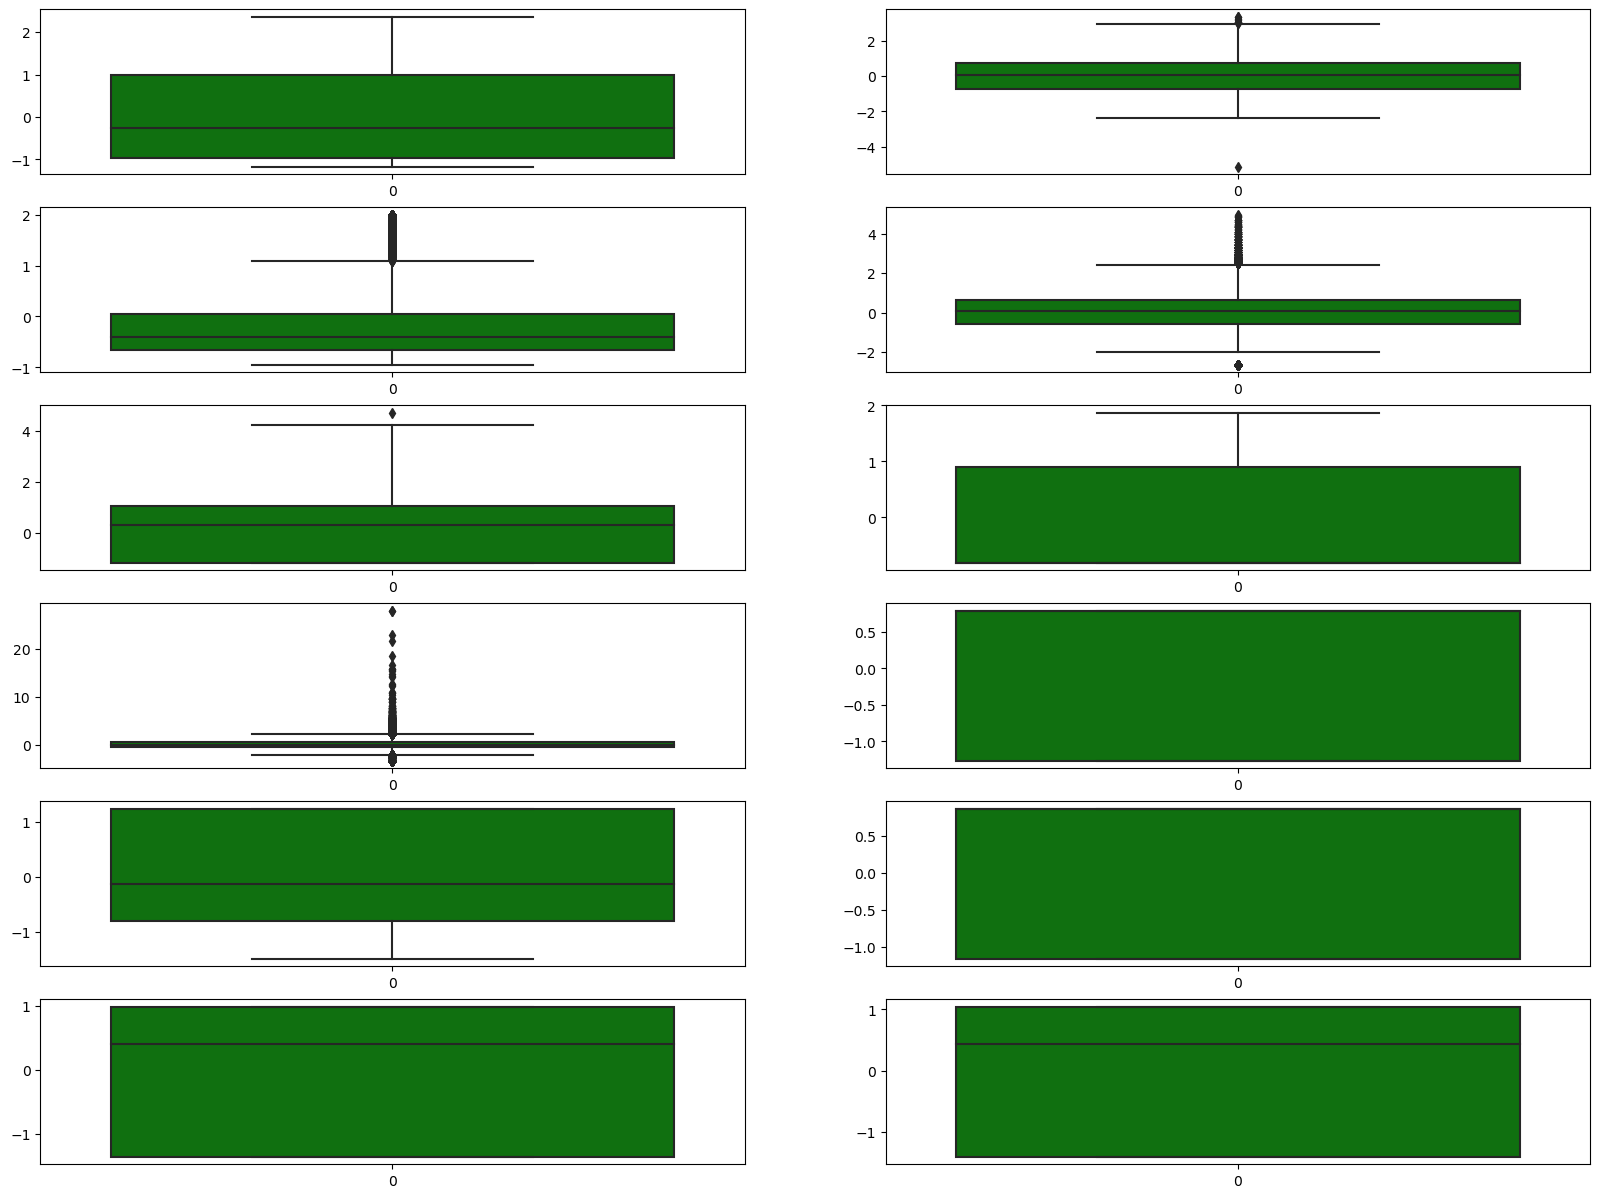

In [113]:
sf = x_train_1.columns

fig , ax = plt.subplots(6 , 2 , figsize=(20,15))
for i,subplot in zip(sf,ax.flatten()):
    sns.boxplot(x_train_1[i],ax=subplot,color = 'g')

## 2.6 Feature Selection

### Using Corelation will find best feature s in the dataset

In [114]:
!pip install feature_engine

In [115]:
from feature_engine.selection import DropCorrelatedFeatures
cor = DropCorrelatedFeatures(threshold=0.85,method='pearson')
cor.fit(x_train_1)

DropCorrelatedFeatures(threshold=0.85)

In [116]:
cor.features_to_drop_

set()

In [117]:
cor.correlated_feature_sets_

[]

In [118]:
# so there are no correlated features in the dataset 

### Checking with Hypothesis Testing for numerical column

In [119]:
from scipy.stats import pearsonr
corr = []
h = ['RevolvingUtilizationOfUnsecuredLines_yoe', 
     'age_yoe','DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe']

for i in h:
    sol = pearsonr(x_train_1[i] , y_train)
    corr.append(sol)
corr = np.array(corr)
print(corr)

[[-2.54167270e-01  0.00000000e+00]
 [ 1.14405690e-01  0.00000000e+00]
 [ 5.52758473e-03  4.22589485e-02]
 [ 4.75998182e-02  1.45687195e-68]
 [ 3.25404146e-02  5.81416273e-33]
 [-4.37228013e-02  3.98875315e-58]
 [ 3.51396707e-02  3.70404611e-38]]


<Axes: >

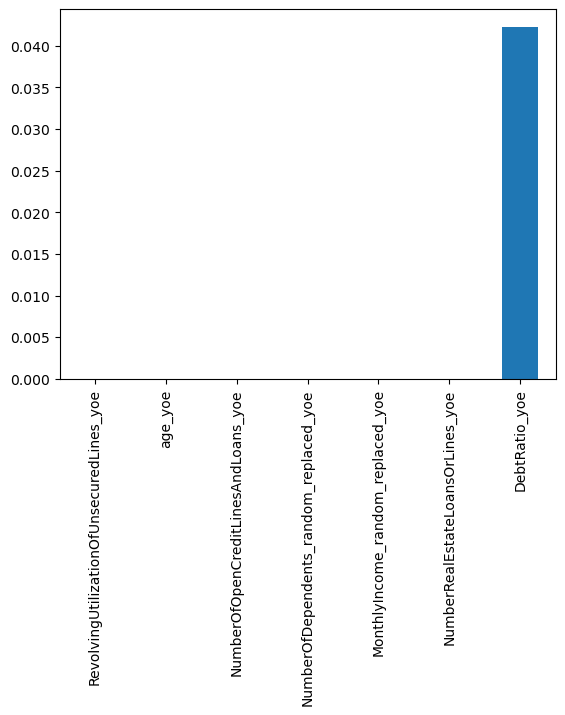

In [120]:
p_value_num = pd.Series(corr[: , 1],index=['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe',
       'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe'])

p_value_num = p_value_num.sort_values(ascending=True)
p_value_num.plot.bar()

#### removing DebitRatio colum from train and test

In [121]:
x_train_1 = x_train_1.drop(['DebtRatio_yoe'], axis = 1)
x_test_1 = x_test_1.drop(['DebtRatio_yoe'], axis = 1)

In [122]:
x_train_1.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe', 'Gender', 'Region',
       'Rented_OwnHouse', 'Occupation_re', 'Education_re'],
      dtype='object')

### Now for categorical col  using chi2 test

In [123]:
chi = x_train_1[['Gender', 'Region',
       'Rented_OwnHouse', 'Occupation_re', 'Education_re']]
chi.head()


# Not going with chi2 because of negative values 

,Gender,Region,Rented_OwnHouse,Occupation_re,Education_re
0,0.790321,1.244231,0.862649,-1.354856,-1.398671
1,0.790321,-1.496478,0.862649,0.987310,-0.788665
2,-1.265309,-0.811300,0.862649,0.987310,-0.788665
3,-1.265309,0.559054,-1.159220,0.987310,0.431346
4,0.790321,-0.126123,-1.159220,0.987310,-1.398671


## [3] Checking Data is balanced or not

### Train Data

In [124]:
## checking whether the data is balanced or not 

print('The value 1 in dependent variable = ',sum(y_train == 1))
print('The value 1 in dependent variable = ',sum(y_train == 0))

#for maintain data balacned we are using upsampling 
# !pip install imblearn 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

x_train_res , y_train_res = sm.fit_resample(x_train_1 , y_train)
print('')

print('The value 1 in dependent variable = ',sum(y_train_res == 1))
print('The value 1 in dependent variable = ',sum(y_train_res == 0))

The value 1 in dependent variable =  125940
The value 1 in dependent variable =  9060

The value 1 in dependent variable =  125940
The value 1 in dependent variable =  125940


### Test Data

In [170]:
print('The value 1 in dependent variable = ',sum(y_test == 1))
print('The value 1 in dependent variable = ',sum(y_test == 0))

#for maintain data balacned we are using upsampling 
# !pip install imblearn 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)

x_test_res , y_test_res = sm.fit_resample(x_test_1 , y_test)
print('')

print('The value 1 in dependent variable = ',sum(y_test_res == 1))
print('The value 1 in dependent variable = ',sum(y_test_res == 0))

The value 1 in dependent variable =  14034
The value 1 in dependent variable =  966

The value 1 in dependent variable =  14034
The value 1 in dependent variable =  14034


In [125]:
# Now, data is balanced so we can develop the model

## [4] Model Development

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### 4.1 KNN Algorithm

In [204]:
def knn(x_train_res, y_train_res ,x_test_res,y_test_res):
    reg = KNeighborsClassifier(n_neighbors=5)
    reg.fit(x_train_res , y_train_res)
    print('Training accuracy = ',reg.score(x_train_res,y_train_res))
    print('Test accuracy = ',reg.score(x_test_res,y_test_res))

    y_test_pred = reg.predict(x_test_res)
    print('Test data confusion_matrix : ',confusion_matrix(y_test_res,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test_res,y_test_pred))

### 4.2 Logistic Regression

In [205]:
def lg(x_train_res, y_train_res ,x_test_res,y_test_res):
    reg1 = LogisticRegression()
    reg1.fit(x_train_res , y_train_res)
    print('Training accuracy = ',reg1.score(x_train_res,y_train_res))
    print('Test accuracy = ',reg1.score(x_test_res,y_test_res))

    y_test_pred = reg1.predict(x_test_res)
    print('Test data confusion_matrix : ',confusion_matrix(y_test_res,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test_res,y_test_pred))

### 4.3 Naive bayes

In [206]:
def NB(x_train_res, y_train_res ,x_test_res,y_test_res):
    reg2 = GaussianNB()
    reg2.fit(x_train_res , y_train_res)
    print('Training accuracy = ',reg2.score(x_train_res,y_train_res))
    print('Test accuracy = ',reg2.score(x_test_res,y_test_res))
    
    y_test_pred = reg2.predict(x_test_res)
    print('Test data confusion_matrix : ',confusion_matrix(y_test_res,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test_res,y_test_pred))

### 4.4 Decision Tree

In [207]:
def DT(x_train_res, y_train_res ,x_test_res,y_test_res):
    reg3 = DecisionTreeClassifier(criterion='entropy')
    reg3.fit(x_train_res , y_train_res)
    print('Training accuracy = ',reg3.score(x_train_res,y_train_res))
    print('Test accuracy = ',reg3.score(x_test_res,y_test_res))

    y_test_pred = reg3.predict(x_test_res)
    print('Test data confusion_matrix : ',confusion_matrix(y_test_res,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test_res,y_test_pred))

### 4.5 Random Forest

In [208]:
def RF(x_train_res, y_train_res ,x_test_res,y_test_res):
    reg4 = RandomForestClassifier()
    reg4.fit(x_train_res , y_train_res)
    print('Training accuracy = ',reg4.score(x_train_res,y_train_res))
    print('Test accuracy = ',reg4.score(x_test_res,y_test_res))

    y_test_pred = reg4.predict(x_test_res)
    print('Test data confusion_matrix : ',confusion_matrix(y_test_res,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test_res,y_test_pred))

In [211]:
def all_algorithms(x_train_res, y_train_res ,x_test_res,y_test_res):
    print('------------*------KNN-----*-----------')
    knn(x_train_res, y_train_res ,x_test_res,y_test_res)
    print('------------*------Logistic Regression-----*-----------')
    lg(x_train_res, y_train_res ,x_test_res,y_test_res)
    print('------------*------Naive Bayes-----*-----------')
    NB(x_train_res, y_train_res ,x_test_res,y_test_res)
    print('------------*------Decision Tree-----*-----------')
    DT(x_train_res, y_train_res ,x_test_res,y_test_res)
    print('------------*------Random Forest-----*-----------')
    RF(x_train_res, y_train_res ,x_test_res,y_test_res)

In [213]:
all_algorithms(x_train_res, y_train_res ,x_test_res,y_test_res)

------------*------KNN-----*-----------
Training accuracy =  0.9464864221057646
Test accuracy =  0.7346800627048596
Test data confusion_matrix :  [[ 8625  5409]
 [ 2038 11996]]
Test data classification_report :                precision    recall  f1-score   support

           0       0.81      0.61      0.70     14034
           1       0.69      0.85      0.76     14034

    accuracy                           0.73     28068
   macro avg       0.75      0.73      0.73     28068
weighted avg       0.75      0.73      0.73     28068

------------*------Logistic Regression-----*-----------
Training accuracy =  0.7610211211688106
Test accuracy =  0.7687758301268348
Test data confusion_matrix :  [[11391  2643]
 [ 3847 10187]]
Test data classification_report :                precision    recall  f1-score   support

           0       0.75      0.81      0.78     14034
           1       0.79      0.73      0.76     14034

    accuracy                           0.77     28068
   macro avg   

In [ ]:
# As we can see above, Among 5 algorithms, Random Forest has better accuracy for both Training and Testing  
# But, we need to check it using AUC & ROC

## [5] Selecting Best Model using AUC(Area under the curve) & ROC(Rectifier operating Characteristics) 

In [214]:
r1 = KNeighborsClassifier()
r1.fit(x_train_res , y_train_res)
y_k = r1.predict_proba(x_test_res)[:,1]

In [215]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = roc_curve(y_test_res, y_k)

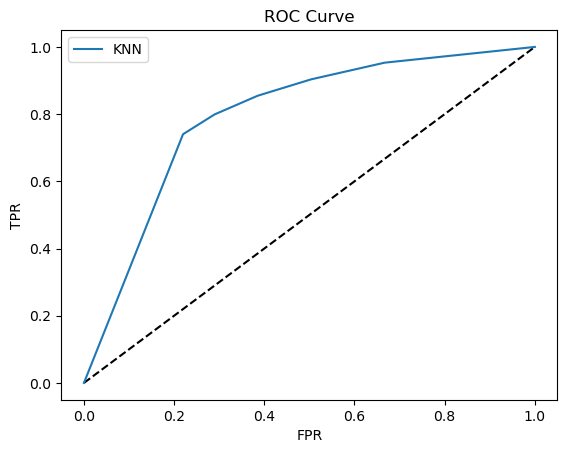

In [216]:
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label = "KNN")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc = 0)
plt.show()

### Plotting AUC & ROC for all models

In [217]:
# Model importing 
r1 = KNeighborsClassifier()
r2 = LogisticRegression()
r3 = GaussianNB()
r4 = DecisionTreeClassifier()
r5 = RandomForestClassifier()

# Model training 
r1.fit(x_train_res , y_train_res)
r2.fit(x_train_res , y_train_res)
r3.fit(x_train_res , y_train_res)
r4.fit(x_train_res , y_train_res)
r5.fit(x_train_res , y_train_res)


# Model testing 
y_K = r1.predict_proba(x_test_res)[:,1]
y_L = r2.predict_proba(x_test_res)[:,1]
y_N = r3.predict_proba(x_test_res)[:,1]
y_D = r4.predict_proba(x_test_res)[:,1]
y_R = r5.predict_proba(x_test_res)[:,1]


# finding FPR and TPR for all models 

fprk, tprk, threshold = roc_curve(y_test_res, y_K)  #KNN
fprL, tprL, threshold = roc_curve(y_test_res, y_L)  # LR
fprN, tprN, threshold = roc_curve(y_test_res, y_N)  # NB
fprD, tprD, threshold = roc_curve(y_test_res, y_D)  # DT
fprR, tprR, threshold = roc_curve(y_test_res, y_R) # RF

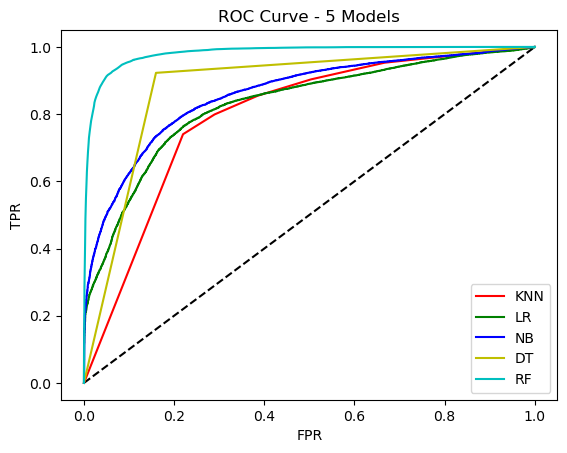

In [218]:
plt.plot([0, 1], [0, 1], "k--")

plt.plot(fprk, tprk, label = "KNN",color = 'r')
plt.plot(fprL, tprL, label = "LR",color = 'g')
plt.plot(fprN, tprN, label = "NB" , color = 'b')
plt.plot(fprD, tprD, label = "DT",color = 'y')
plt.plot(fprR, tprR, label = "RF" , color = 'c')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - 5 Models")
plt.legend(loc = 0)
plt.show()

In [219]:
# Since Light Blue line is high its belongs to Random Forest
# It's the best model

### Prediction with test data

In [232]:
x_test_res.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_random_replaced_yoe',
       'MonthlyIncome_random_replaced_yoe', 'Gender', 'Region',
       'Rented_OwnHouse', 'Occupation_re', 'Education_re'],
      dtype='object')

In [233]:
len(x_test_res.columns)

11

In [238]:
x_test_res

,RevolvingUtilizationOfUnsecuredLines_yoe,age_yoe,NumberOfOpenCreditLinesAndLoans_yoe,NumberRealEstateLoansOrLines_yoe,NumberOfDependents_random_replaced_yoe,MonthlyIncome_random_replaced_yoe,Gender,Region,Rented_OwnHouse,Occupation_re,Education_re
0,0.277508,0.298093,0.081558,0.300281,1.338588,0.510461,-1.265309,1.244231,-1.159220,-0.183773,1.041352
1,-1.173791,-0.034995,-0.875388,0.300281,1.338588,0.984171,0.790321,-0.811300,0.862649,0.987310,0.431346
2,-1.173791,-1.268382,0.458186,1.054648,0.895735,0.420648,0.790321,1.244231,-1.159220,0.987310,-1.398671
3,-1.173791,-0.380005,-0.352827,1.054648,-0.812543,-1.129693,0.790321,-0.811300,0.862649,-0.769315,0.431346
4,-1.035945,1.178330,-0.600210,-1.180732,-0.812543,0.125107,0.790321,1.244231,0.862649,-0.183773,1.041352
...,...,...,...,...,...,...,...,...,...,...,...
28063,1.312116,-1.373515,-0.189305,0.846497,1.216392,-0.795056,0.790321,-0.126123,-1.159220,-0.183773,1.041352
28064,-0.300452,-0.450010,0.458890,1.054648,1.527717,0.289331,0.781906,-0.811300,-1.159220,-1.354856,-1.398671
28065,1.575283,-0.825930,-0.279039,0.812264,1.038027,0.153233,-1.265309,-0.346276,0.862649,0.987310,-0.374659
28066,1.377199,0.545296,-1.493897,-1.180732,-0.812543,-0.460060,-1.265309,-0.126123,-1.159220,0.616693,0.431346


In [228]:
# test data Index[0], Random Forest=reg4

if reg4.predict([[0.277508,0.298093,0.081558,0.300281,1.338588,0.510461,-1.265309,1.244231,-1.159220,-0.183773,1.041352]]) == 0:          # Random Forest=reg4
    print('Fraud Transcation')
else:
    print('Good Transcation')

Good Transcation


In [237]:
# test data Index[28067], Random Forest=reg4

if reg4.predict([[1.013575,0.642511,0.778462,0.985311,-0.812543,-0.257092,0.790321,-0.189101,-1.159220,0.987310,-0.844733]])==0:
    print('Fraud Transcation')
else:
    print('Good Transcation')

Fraud Transcation
